# 5.1 데이터 세트추출과 활용

## 5.1.1 위키백과 데이터 세트 다운로드하기

### 위키백과 데이터 세트 개요

Index of /kowiki/

https://dumps.wikimedia.org/kowiki/

[파일 다운로드]

kowiki-20200620-pages-articles1.xml-p1p76864.bz2 58.5 MB

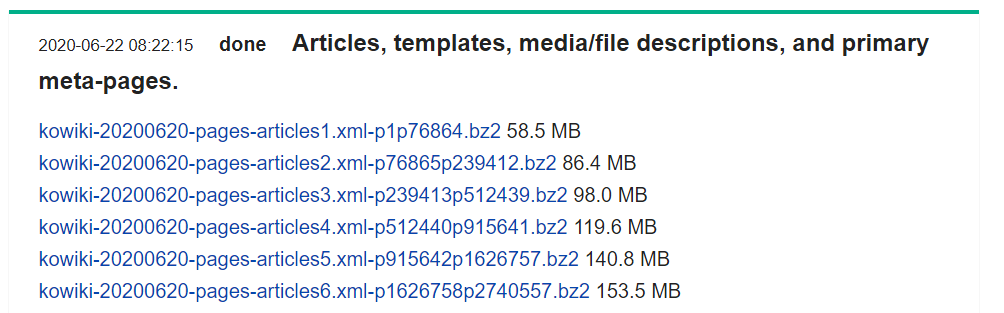

### 위키백과 데이터 파일 내용 확인

##### 위키백과 데이터 XML 파일

kowiki-20200620-pages-articles-multistream1.xml-p1p76864

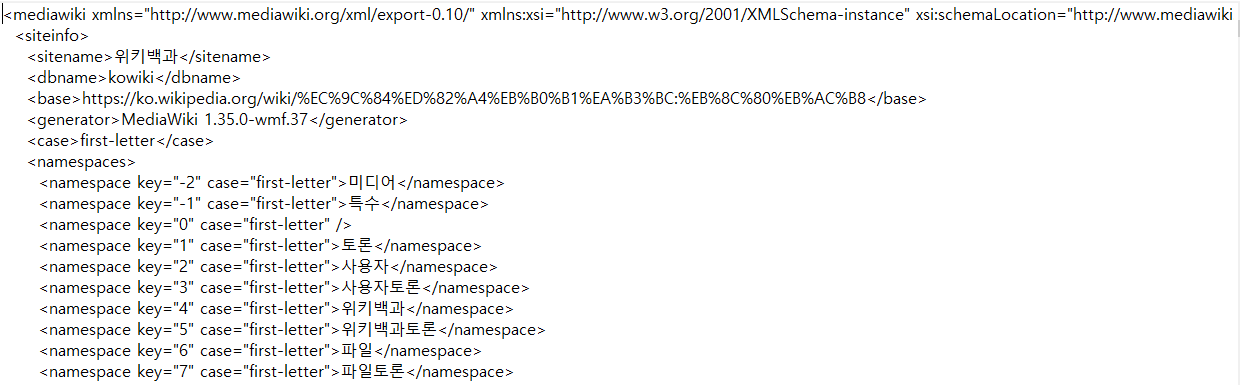

### 위키백과 데이터 세트에서 문장 추출하기

text 내부의 문자열은 단순한 문자열이 아니라 Media Wiki（위키백과에서 사용하는 위키 엔진）로마크업돼 있음

이를 일반적인 한국어 문장으로 변환하려면 마크업을 제거해야됨

WikiExtractor라는 파이썬 스크립트를 사용해 간단하게 문장을 추출

https://github.com/attardi/wikiextractor

### 위키피디아 한국어 덤프 파일 변환

python WikiExtractor.py kowiki-20200620-pages-articles-multistream1.xml

## 5.1.2 자연어 처리를 사용한 빈출 단어 추출

파이썬 한국어 형태소 분석 라이브러리 KoNLPy（http://konlpy.org/ko/latest/）
    
KoNLPy를 이용하면 한나눔, 꼬꼬마，Komoran, MeCab, 트위터 등의 형태소 분석기를 쉽게 사용 가능

### KoNLpy 설치

1. KoNLPy는 내부적으로 자바를 사용하므로 자바를 설치

https://www.oracle.com/java/technologies/javase-downloads.html

오라클 계정 생성 및 로그인 필요

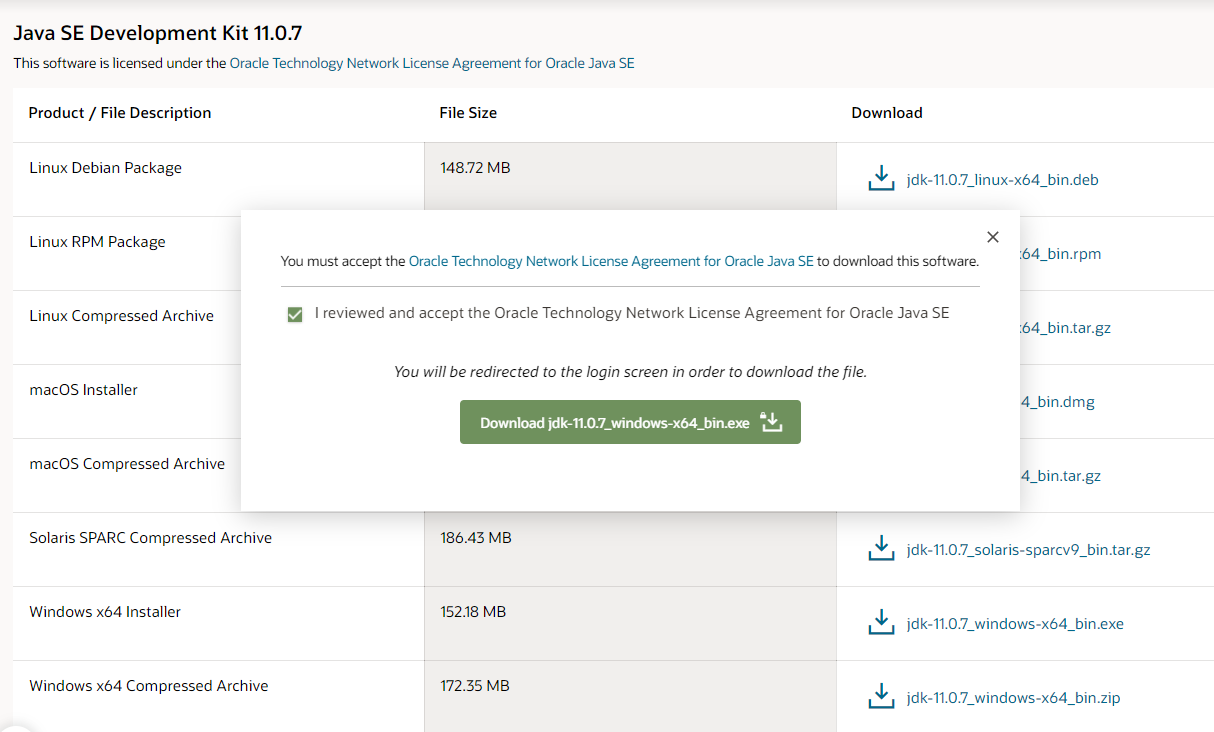

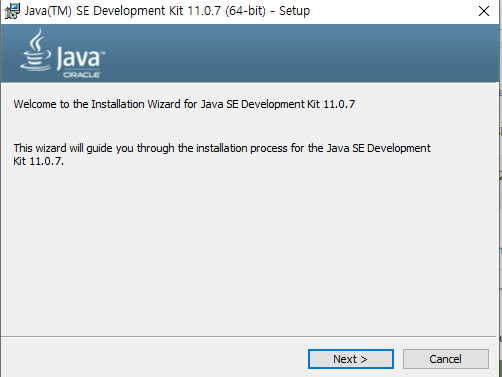

JavaSetup8u251.exe

2. Java 환경변수 설정

https://webnautes.tistory.com/1394

윈도우 키 + R을 누른 후,  sysdm.cpl를 실행

고급탭에서 환경변수 버튼을 클릭한 후, 시스템 변수 항목에 있는 새로 만들기 버튼을 클릭

변수 이름 항목에 JAVA_HOME을 적고 변수 값 항목에 다음 경로를 입력

다운로드 받은 JDK 버전에 따라 경로가 다를 수 있으니 확인 필요 

C:\Program Files\Java\jdk1.8.0_231

3. JPype를 설치

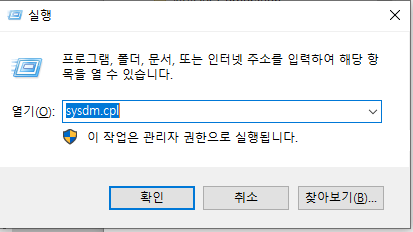

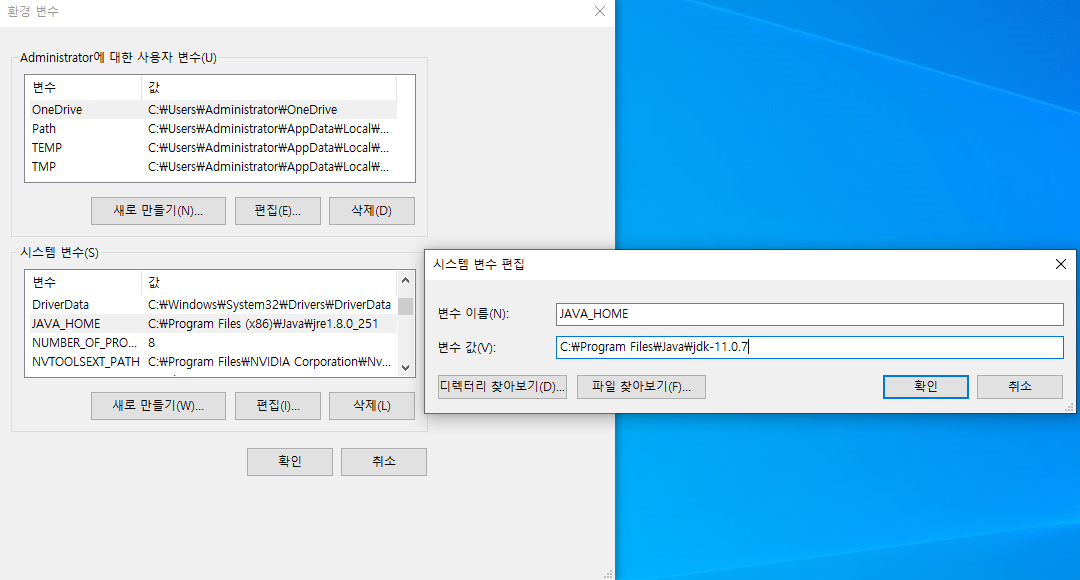

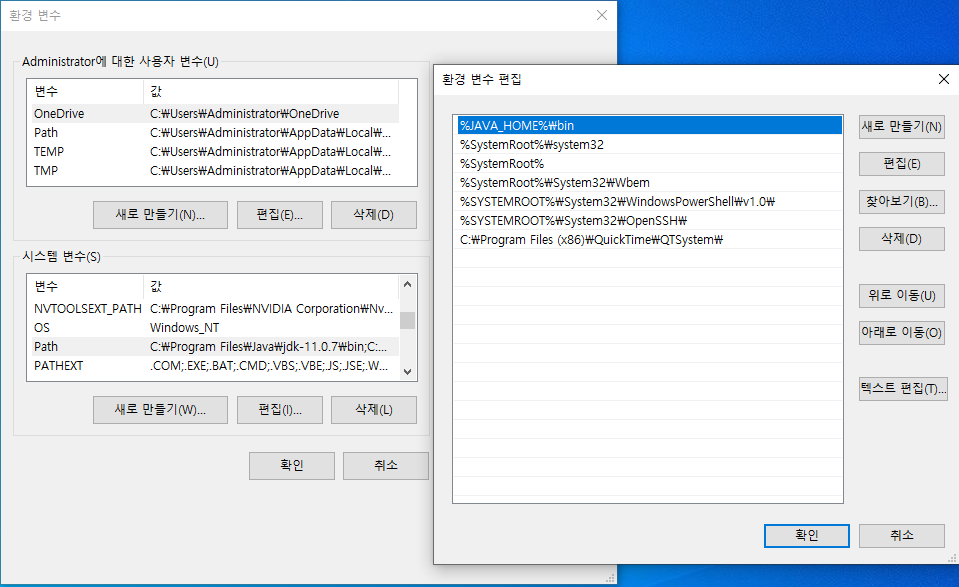

https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype

Python 3.7과 64비트 윈도우를 사용중이면 JPype1‑0.7.5‑cp37‑cp37m‑win_amd64.whl 설치

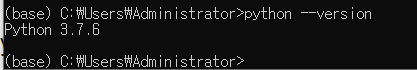

파일 이동 

C:\Users\Administrator\JPype1-0.7.5-cp37-cp37m-win_amd64.whl

pip install JPype1-0.7.5-cp37-cp37m-win_amd64.whl

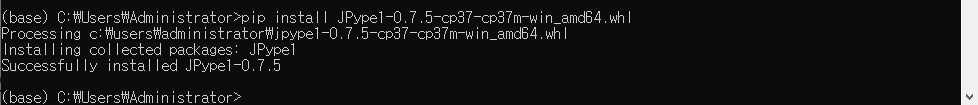

KoNLPy를 설치

pip install konlpy

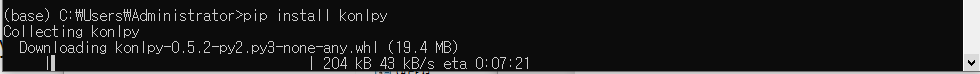

### KoNLPy로 형태소 분석하기

예제 5.1 konlpy_sample.py

In [4]:
from konlpy.tag import Kkma

kkma = Kkma()
malist = kkma.pos("아버지 가방에 들어가신다.")
print(malist)

[('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN'), ('.', 'SF')]


In [2]:
from konlpy.tag import Kkma

kkma = Kkma()
malist = kkma.pos("외관은 낡았으나 내부는 수리되서 깨끗. 나무가 울창해서 숲안에 사는 기분")
print(malist)

[('외관', 'NNG'), ('은', 'JX'), ('낡', 'VA'), ('았', 'EPT'), ('으나', 'ECE'), ('내부', 'NNG'), ('는', 'JX'), ('수리', 'NNG'), ('되', 'XSV'), ('서', 'ECD'), ('깨끗', 'XR'), ('.', 'SF'), ('나무', 'NNG'), ('가', 'JKS'), ('울창', 'XR'), ('하', 'XSA'), ('어서', 'ECD'), ('숲', 'NNG'), ('안', 'NNG'), ('에', 'JKM'), ('살', 'VV'), ('는', 'ETD'), ('기분', 'NNG')]


KkmaO 메서드로 kkma 객체를 생성하고，pos() 메서드에 형태소 분석을 수행할 문장을 지정

결과로 출력된 튜플의 리스트는 (〈형태소＞, ＜품사＞)를 의미

품사의 의미는 꼬꼬마 공식 문서 (http://kkma.snu.ac.kr/documents/?doc=postag)를 참고

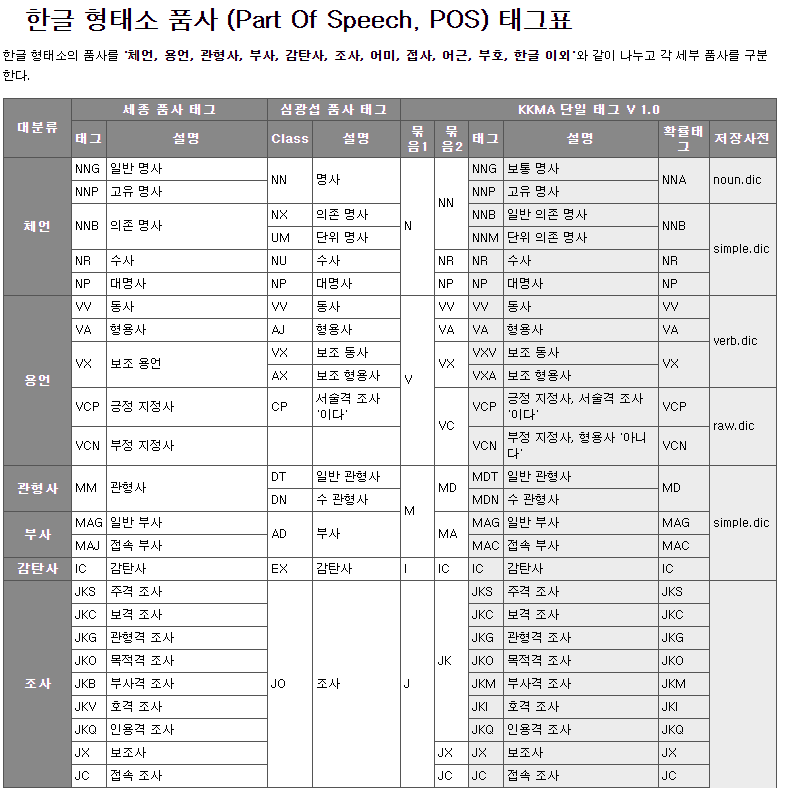

#### 문장에서 빈출 단어 추출하기

예제 5.2 word_frequency.py

In [3]:
import sys
import os
from glob import glob
from collections import Counter
from konlpy.tag import Kkma

def main():
    """
    명령라인 매개변수로 지정한
    디렉터리 내부의 파일을 읽어 들이고
    빈출 단어를 출력합니다.
    """
    # 명령어의 첫 번째 매개변수로
    # WikiExtractor의 출력 디렉터리를 지정합니다.
    input_dir = sys.argv[1]
    kkma = Kkma()
    # 단어의 빈도를 저장하기 위한 Counter 객체를 생성합니다.
    # Counter 클래스는 dict를 상속받는 클래스입니다.
    frequency = Counter()
    count_proccessed = 0
    # glob()으로 와일드카드 매치 파일 목록을 추출하고
    # 매치한 모든 파일을 처리합니다.
    for path in glob(os.path.join(input_dir, '*', 'kowiki_*')):
        print('Processing {0}...'.format(path), file=sys.stderr)
        # 파일을 엽니다.
        with open(path) as file:
            # 파일 내부의 모든 기사에 반복을 돌립니다.
            for content in iter_docs(file):
                # 페이지에서 명사 리스트를 추출합니다.
                tokens = get_tokens(kkma, content)
                # Counter의 update() 메서드로 리스트 등의 반복 가능 객체를 지정하면
                # 리스트에 포함된 값의 출현 빈도를 세어줍니다.
                frequency.update(tokens)
                # 10,000개의 글을 읽을 때마다 간단하게 출력합니다.
                count_proccessed += 1
                if count_proccessed % 10000 == 0:
                    print('{0} documents were processed.'
                        .format(count_proccessed),file=sys.stderr)
    
    # 모든 기사의 처리가 끝나면 상위 30개의 단어를 출력합니다
    for token, count in frequency.most_common(30):
        print(token, count)

def iter_docs(file):
    """
    파일 객체를 읽어 들이고
    기사의 내용(시작 태그 <doc>와 종료 태그 </doc> 사이의 텍스트)를 꺼내는
    제너레이터 함수
    """
    for line in file:
        if line.startswith('<doc '):
            # 시작 태그가 찾아지면 버퍼를 초기화합니다.
            buffer = []
        elif line.startswith('</doc>'):
            # 종료 태그가 찾아지면 버퍼의 내용을 결합한 뒤 yield합니다.
            content = ''.join(buffer)
            yield content
        else:
            # 시작 태그/종료 태그 이외의 줄은 버퍼에 추가합니다.
            buffer.append(line)

def get_tokens(kkma, content):
    """
    문장 내부에 출현한 명사 리스트를 추출하는 함수
    """
    # 명사를 저장할 리스트입니다.
    tokens = []
    node = kkma.pos(content)
    for (taeso, pumsa) in node:
        # 고유 명사와 일반 명사만 추출합니다.
        if pumsa in ('NNG', 'NNP'):
            tokens.append(taeso)
    return tokens

if __name__ == '__main__':
    main()

# 5.2	API로 데이터 수집하고 활용하기

## 5.2.1 트위터에서 데이터 수집하기

트위터에서는 데이터 수집에 사용할 API로 REST API와 Streaming API라는 두 가지 API를 제공

Streaming API에는 여러 가지 종류가 있는데, 일반적인 사용자는 다음과 같은 것들을 사용할 수 있음

■	Public streams： 트위터 사용자 전체 공개 스트림

filter： 특정 키워드 또는 사용자로 압축하는 스트림

sample： 공개된 모든 트윗 내부에서 일부를 무작위로 샘플링한 스트림

■	User streams： 사용자의 타임라인 등 한 명의 사용자와 관련된 스트림

### 트위터 API 인증

트위터 API를 사용하려면 OAuth 1.0a 인증이 필요

애플리케이션 단위로 발행되는 Consumer Key와 Consumer Secret, 사용자 단위로 발행되는 Access Token과 Access Token Secret이라는 4 가지가 모두 필요

1. 애플리케이션 관리 화면(https://apps.twitter.com/)에 트위터 계정으로 로그인

2. "Create New App”이라는 버튼을 누르고 애플리케이션 생성 정보 입력(애플리케이션의 이름, 설명，웹사이트, 사용 약관에 동의)

3. 데이터 수집을 목적으로 하는 경우 Callback URL을 따로 입력하지 않아도 됨

4. 애플리케이션을 생성하고 "Keys and Access Tokens”라는 링크를 클릭하면 화면에 Consumer Key 와 Consumer Secret0] 출력

5. “Create my access token”이라는 버튼을 누르면 자신의 계정과 연결된 Access Token과 Access Token Secret이 생성

6. 이렇게 생성된 4개의 값을 사용해 실제로 API를 사용

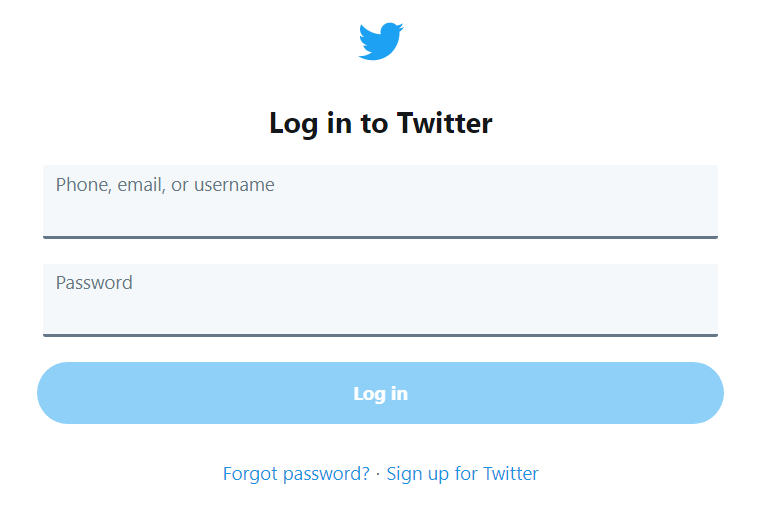

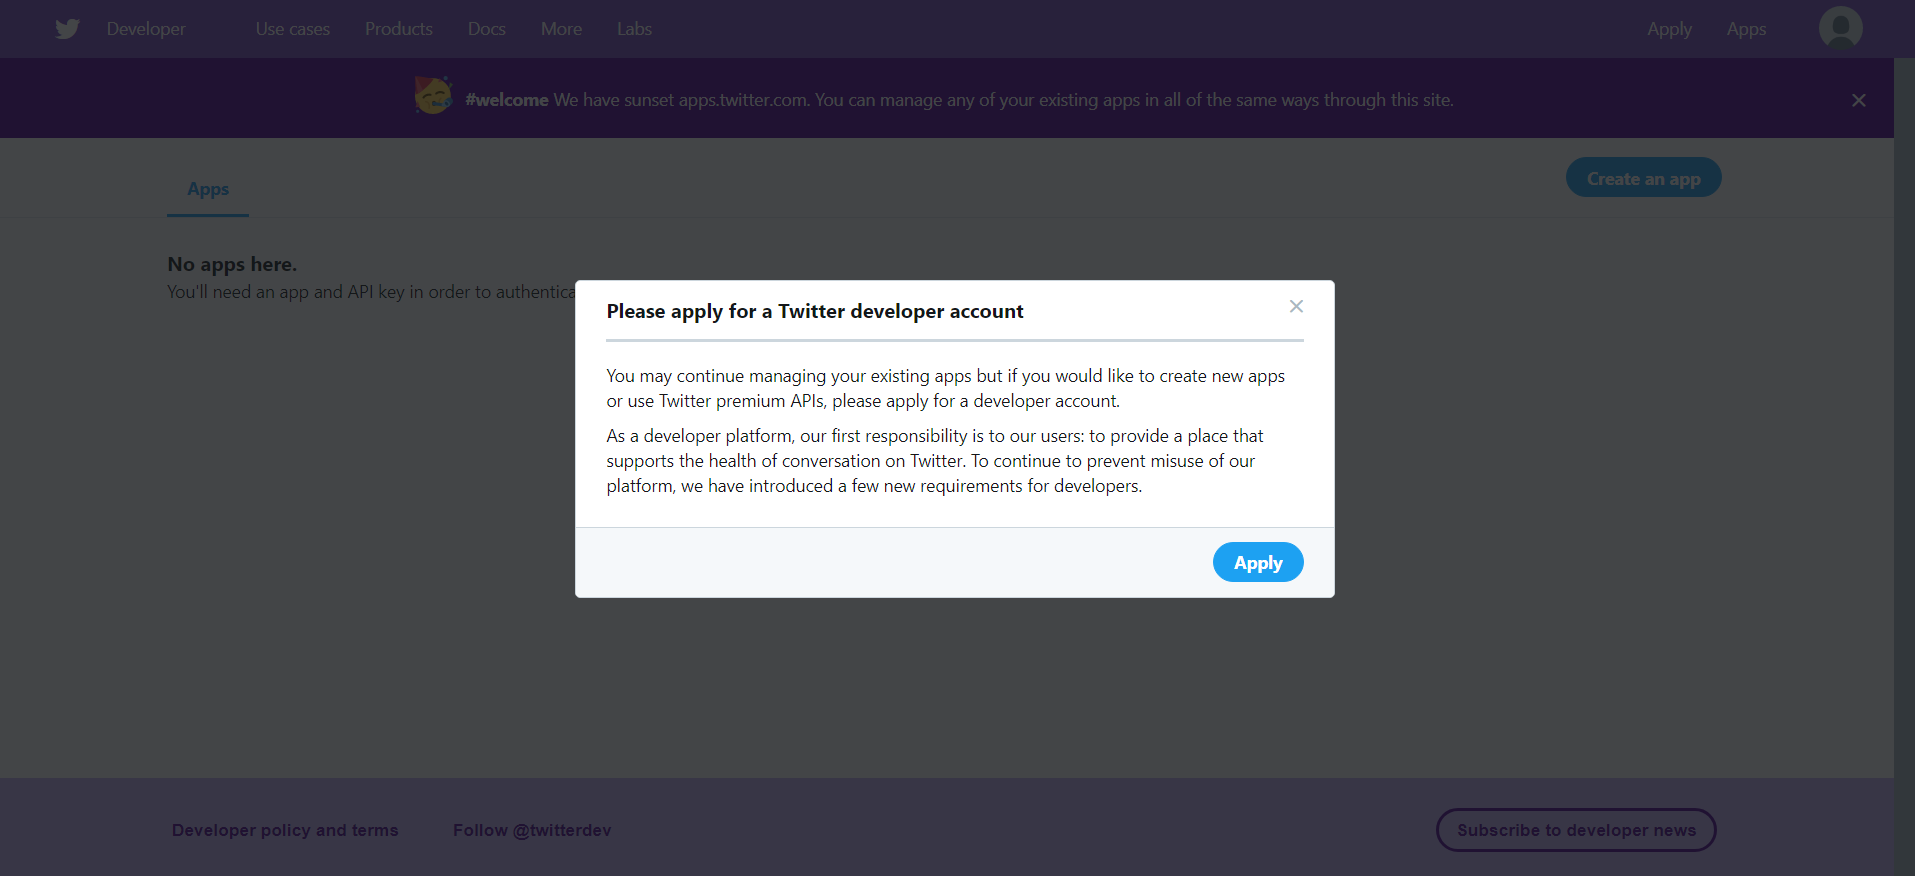

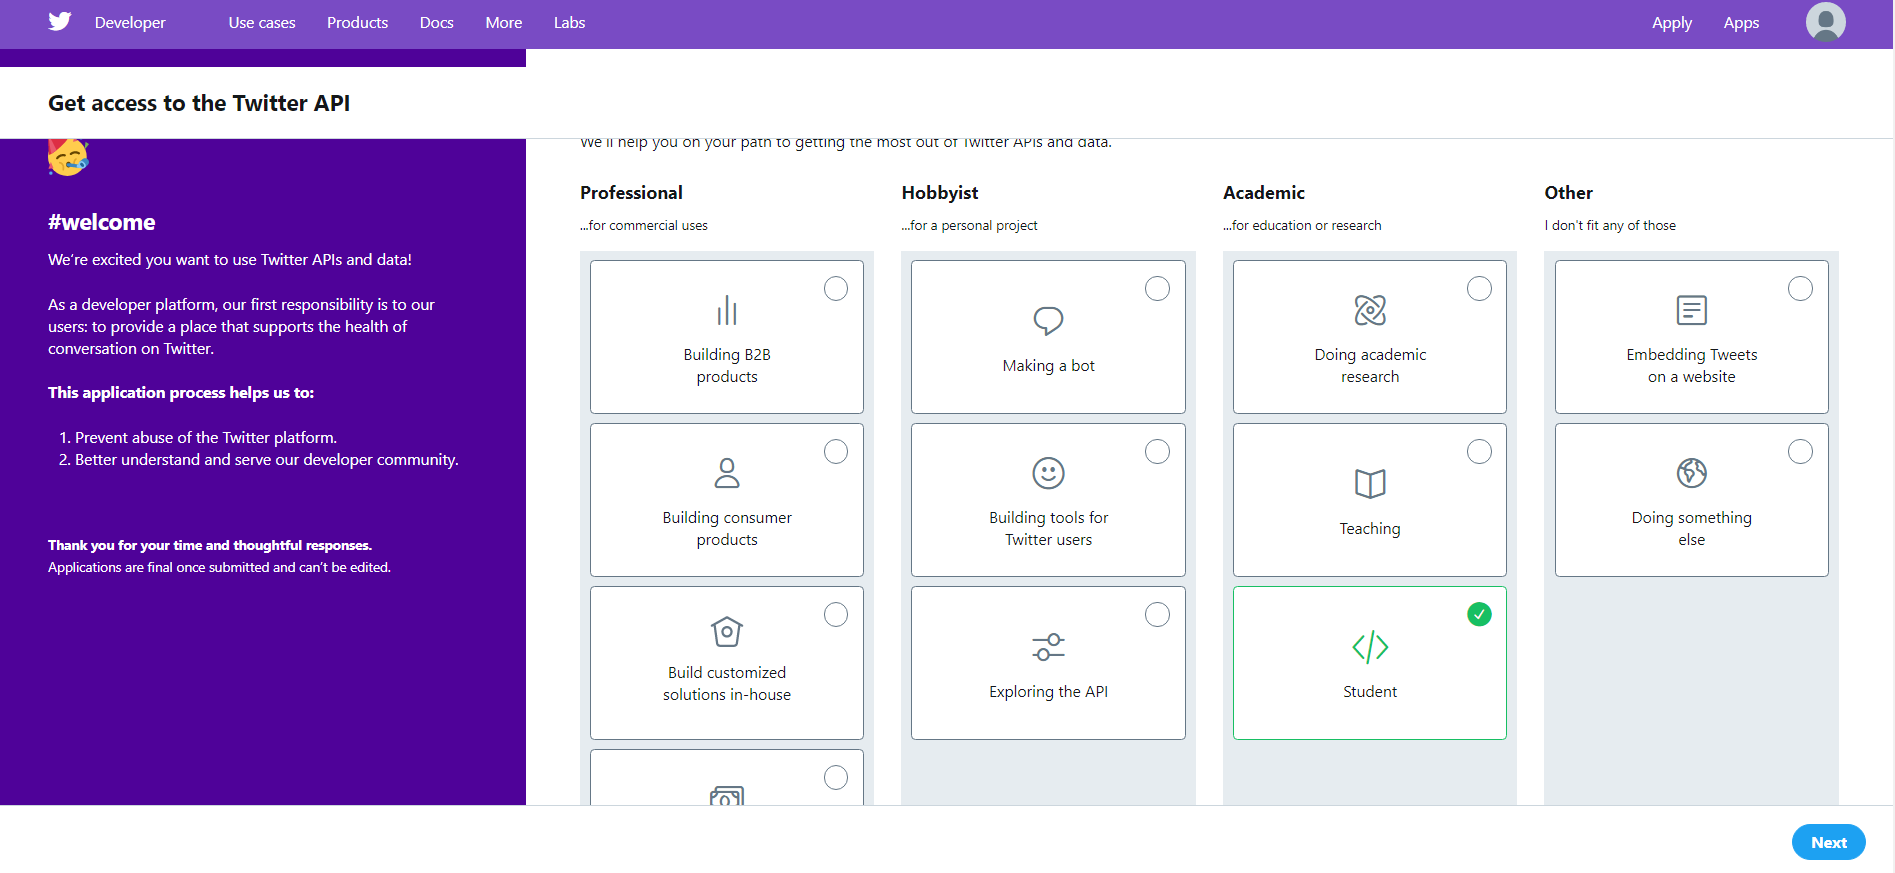

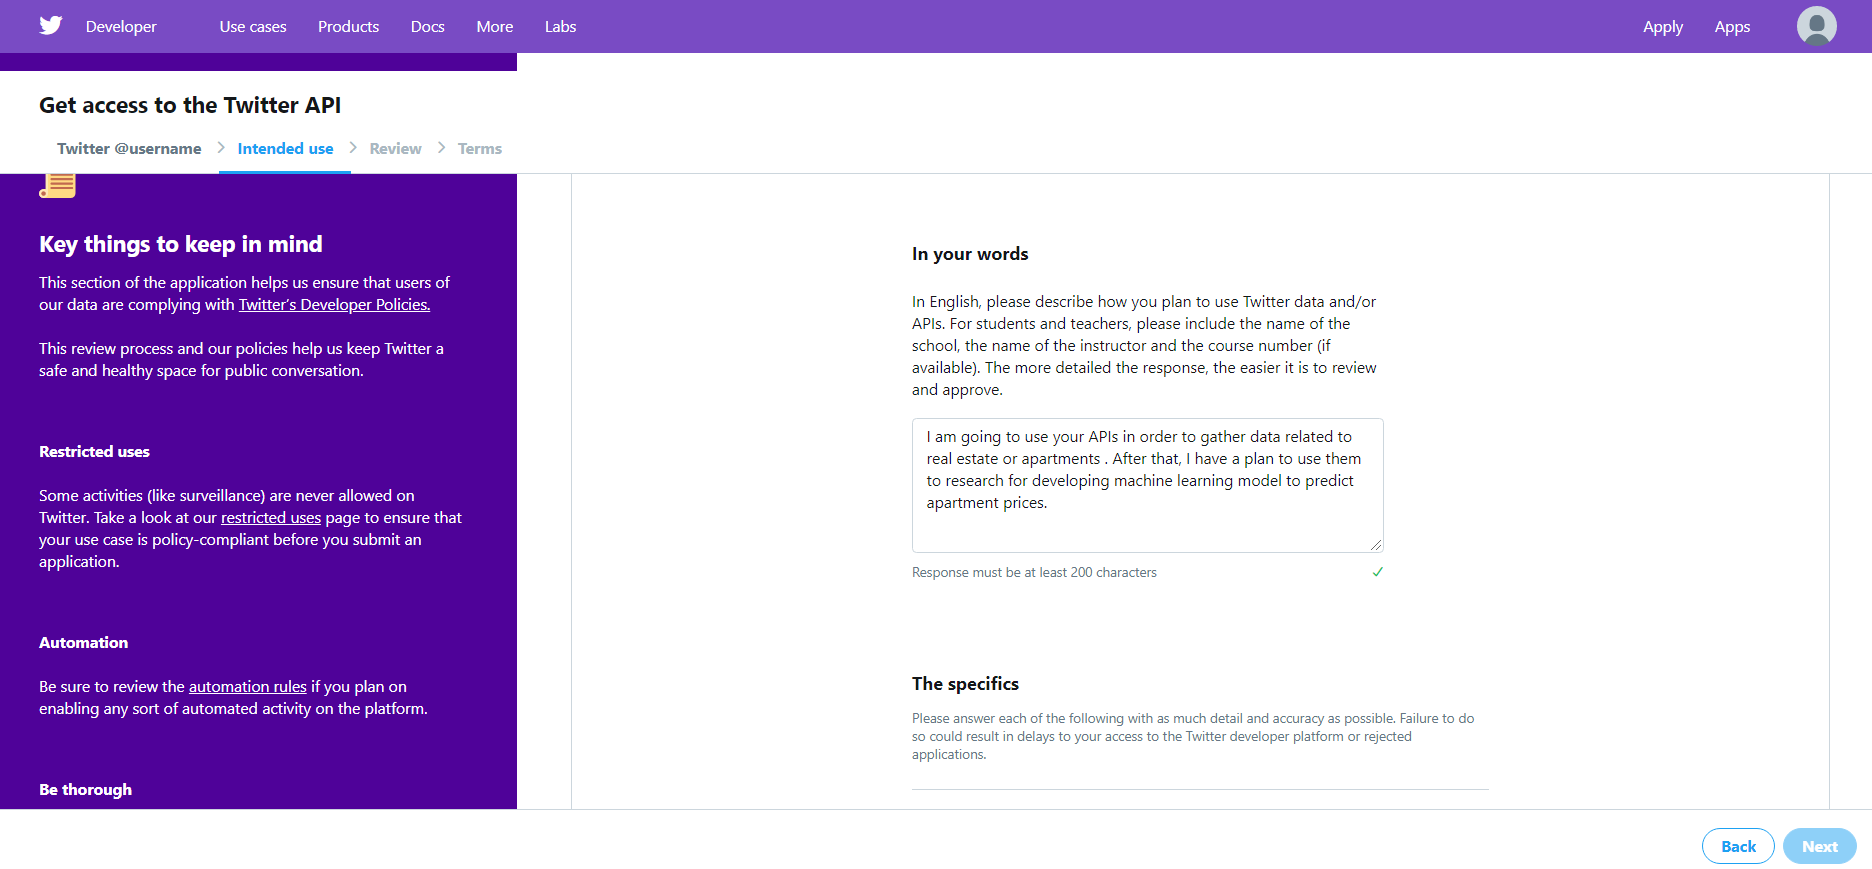

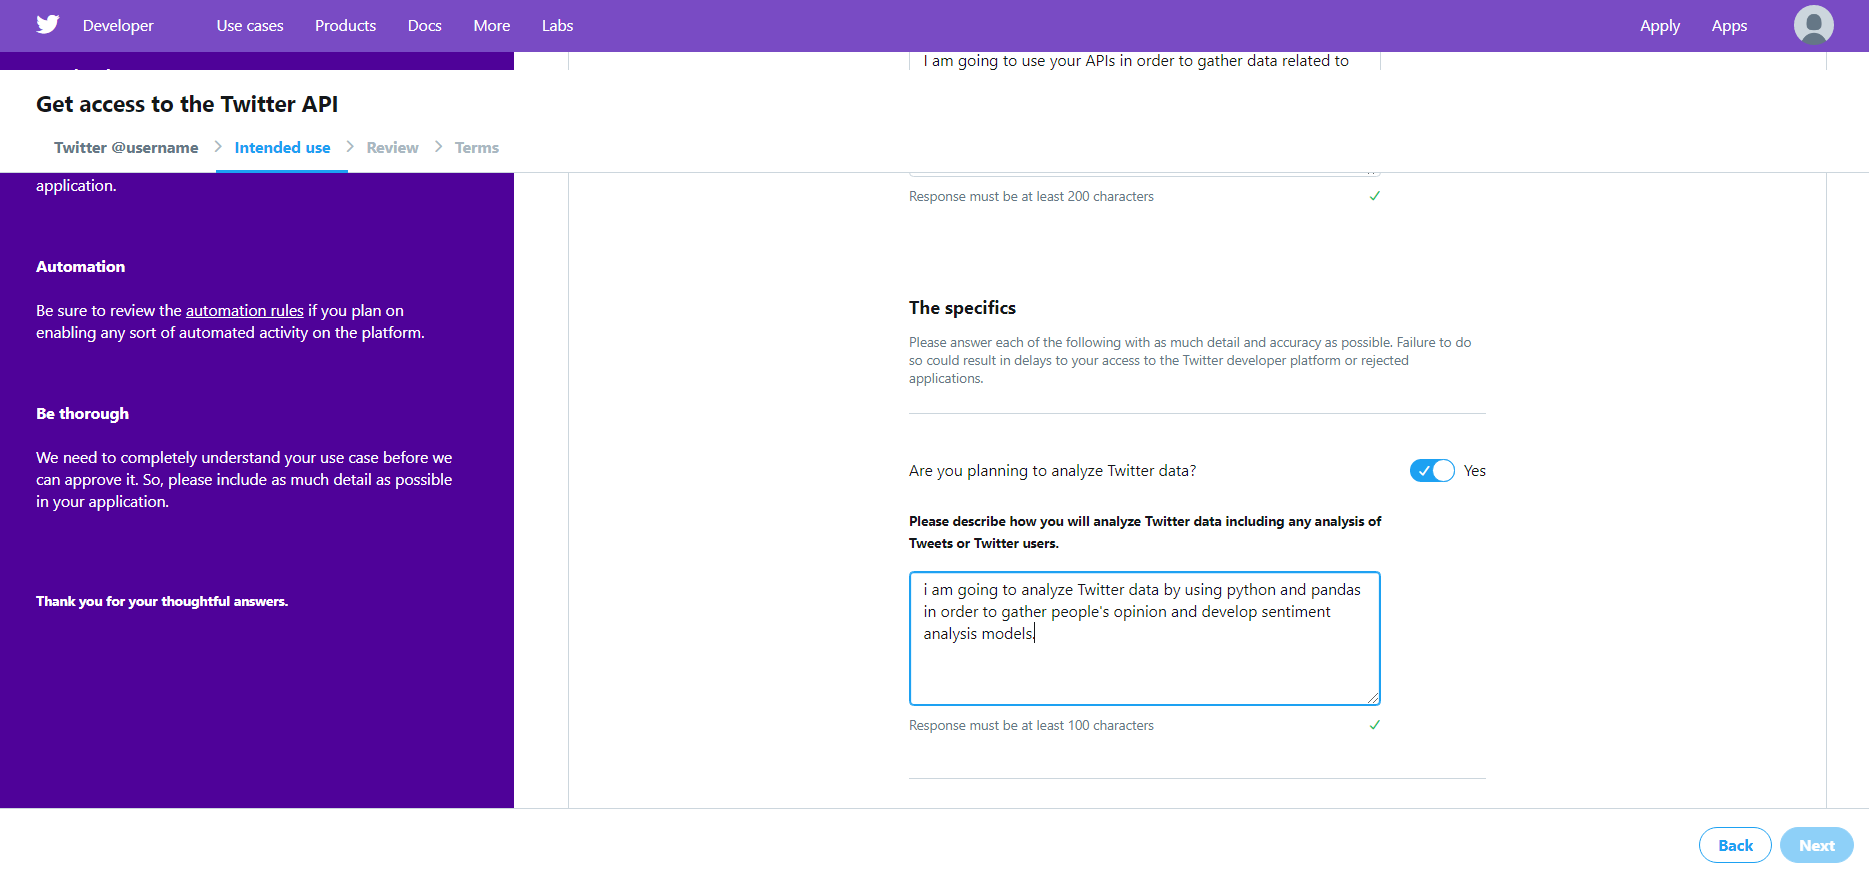

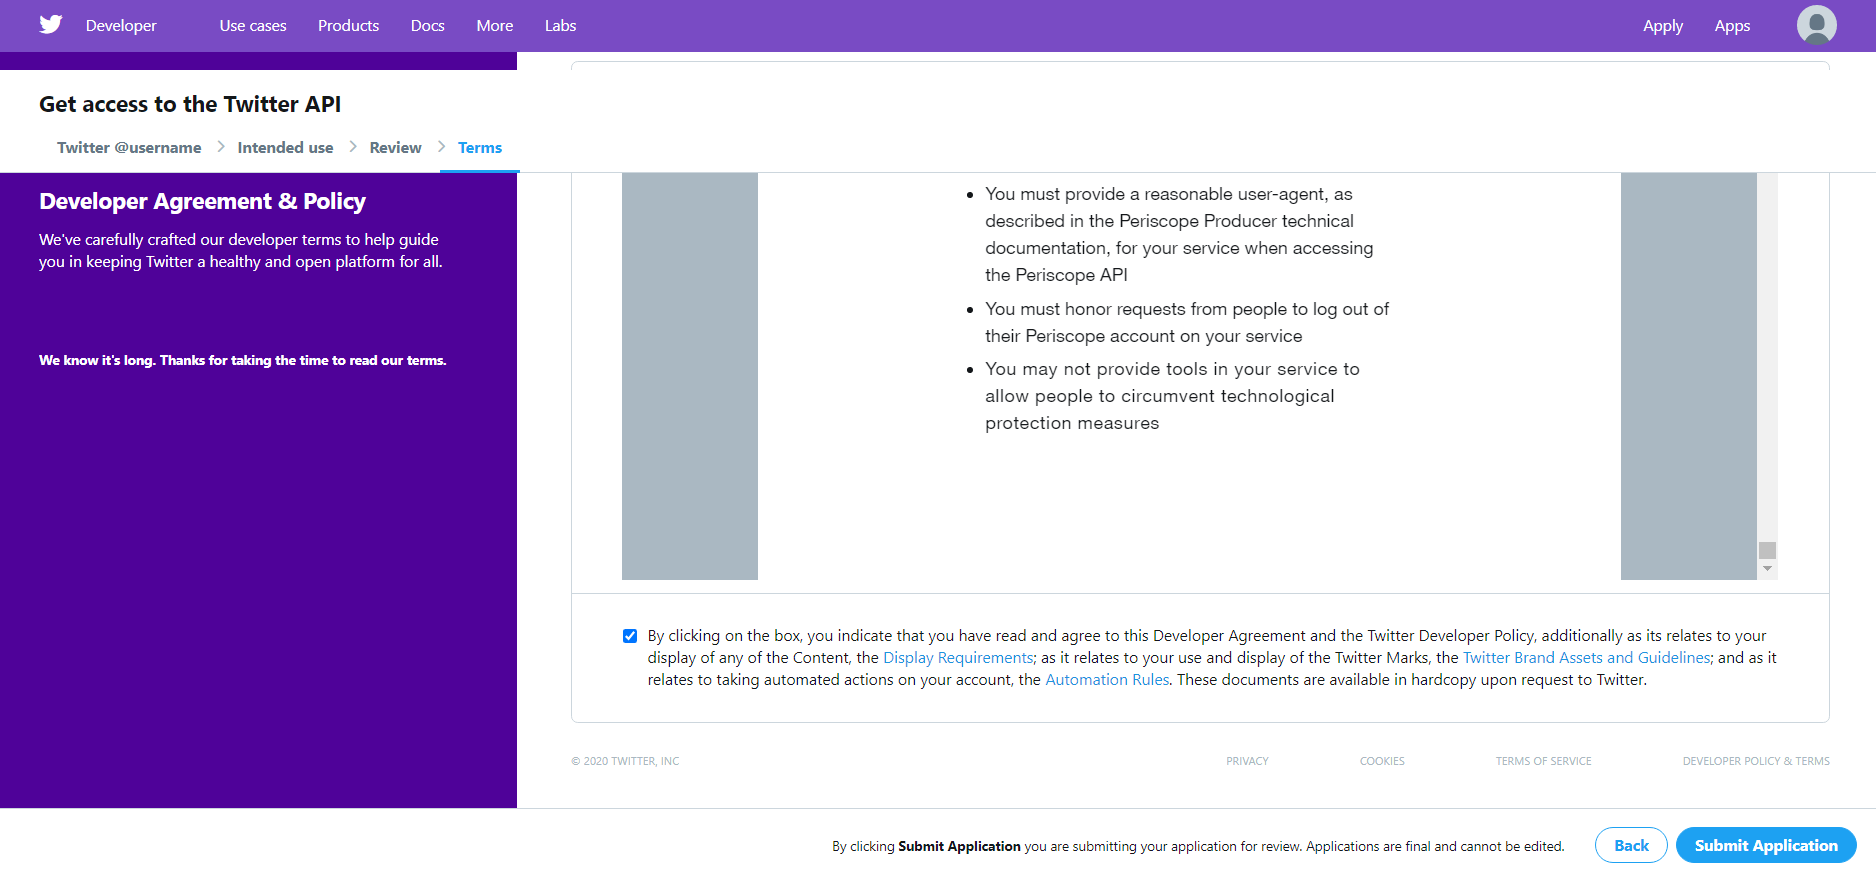

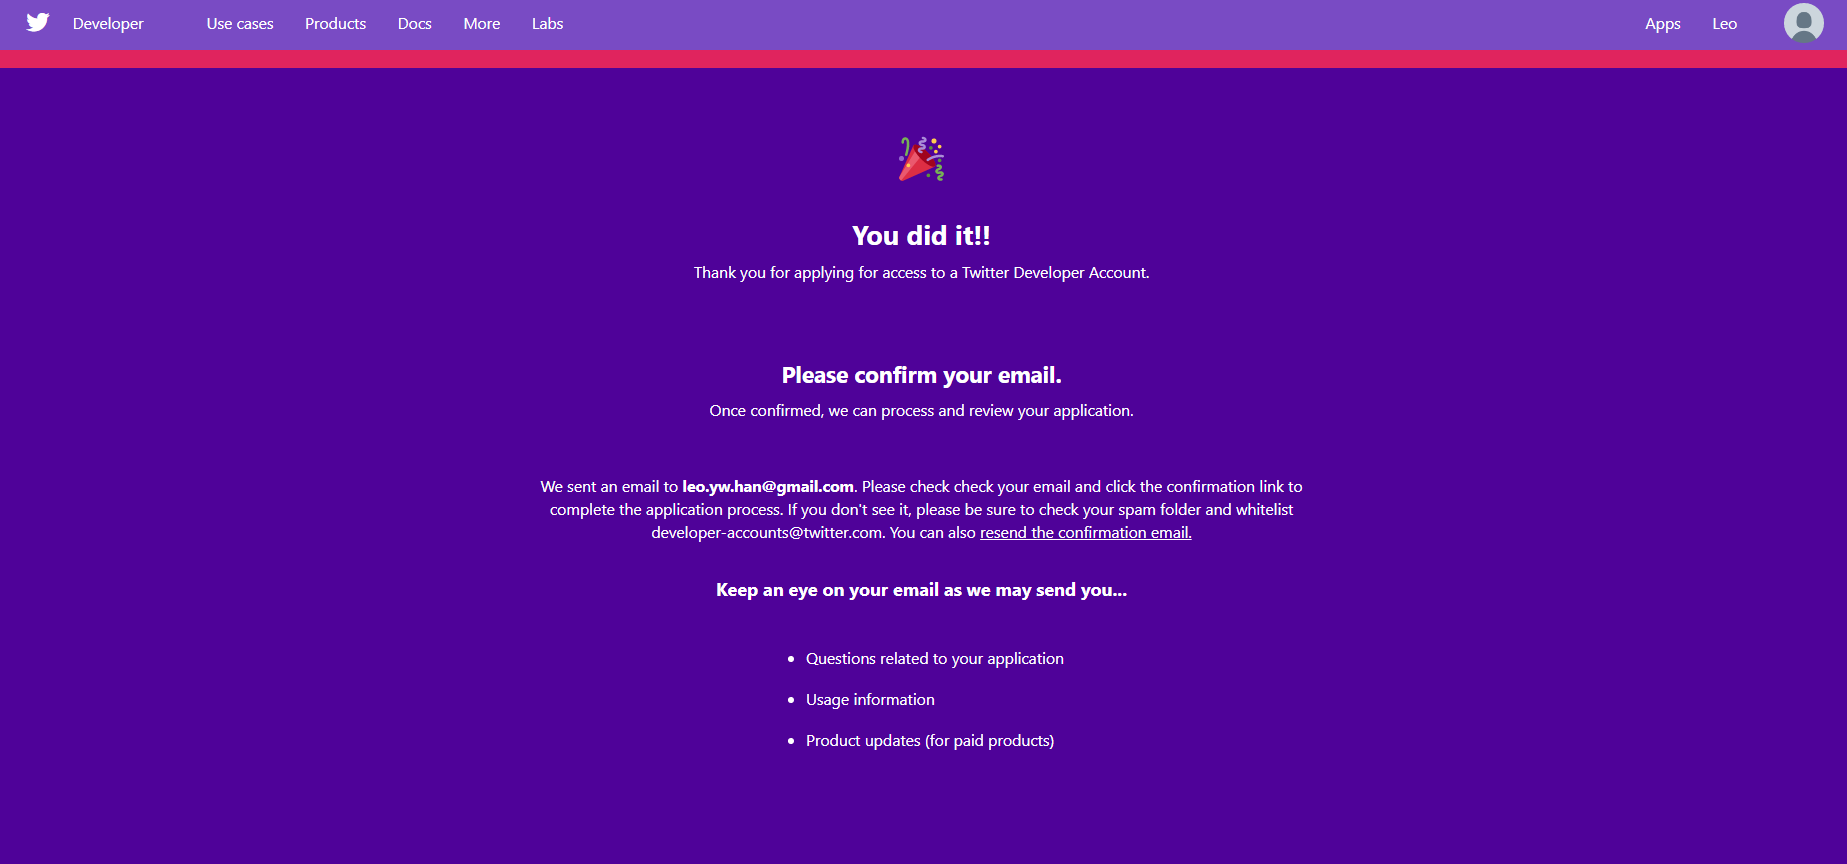

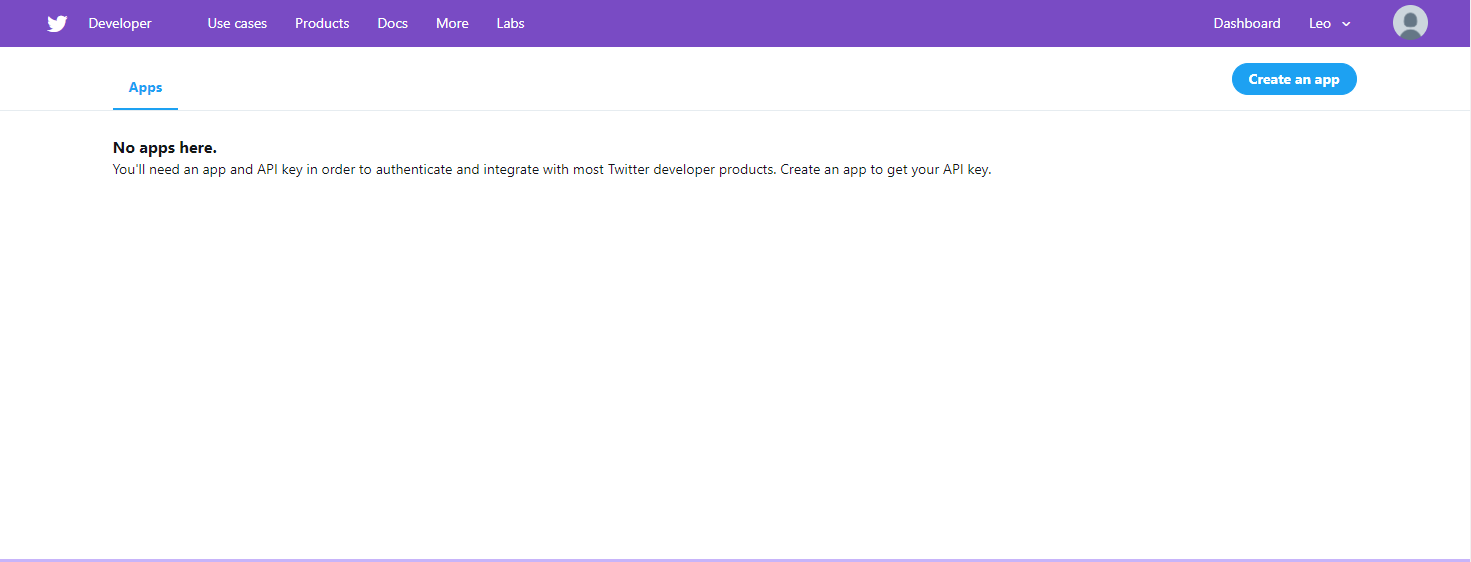

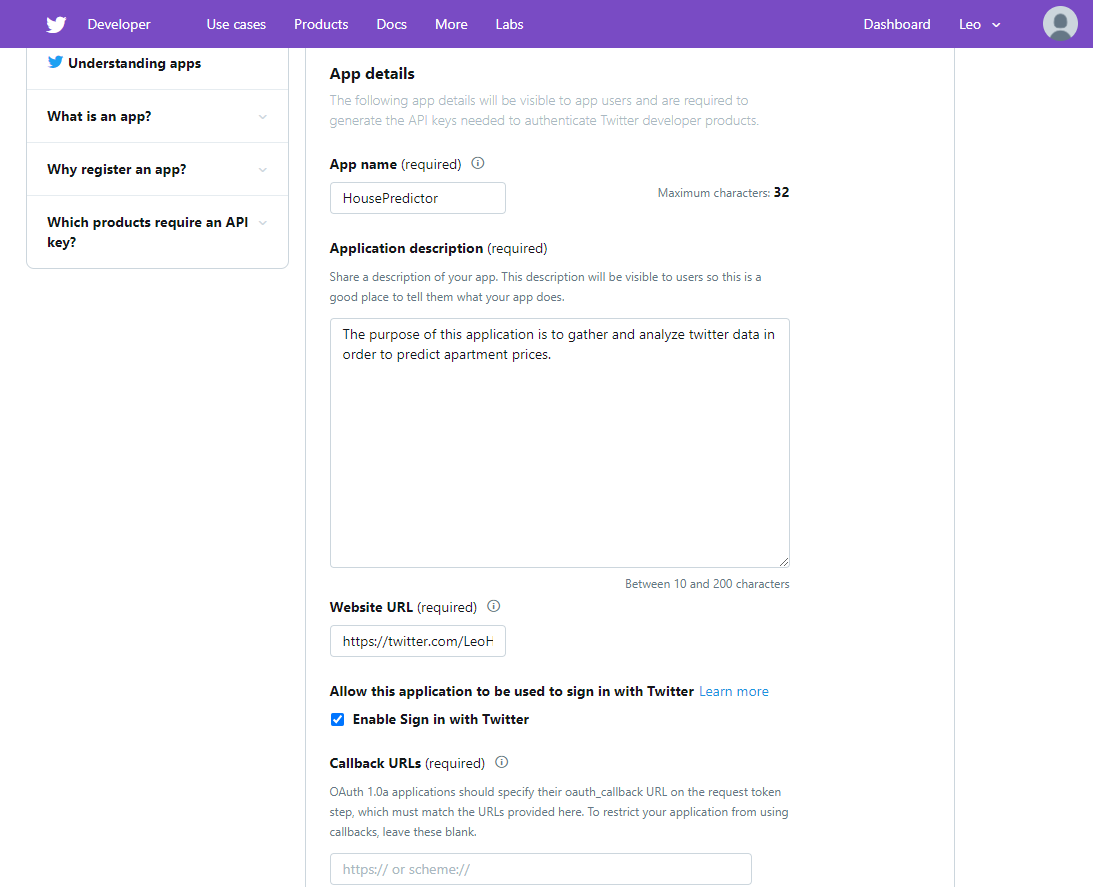

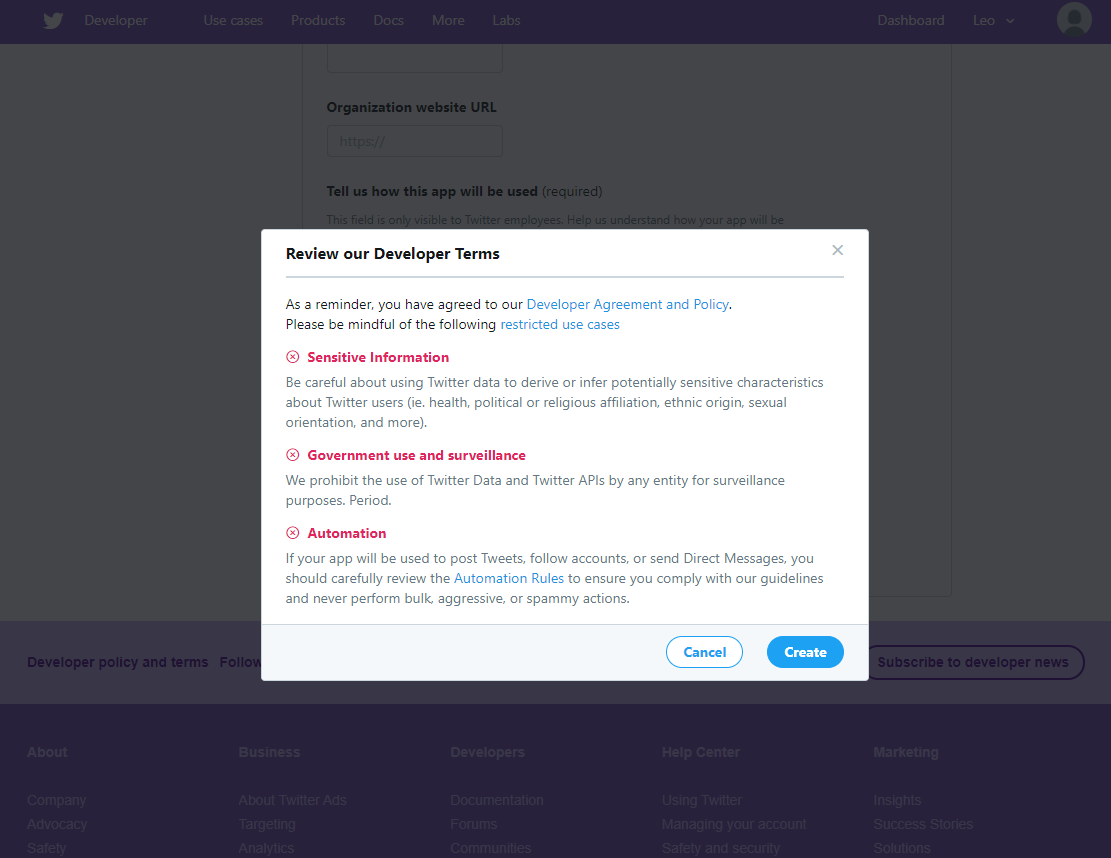

### 간단한 트위터 REST API 사용하기

일단은 Requests를 사용해 API를 호출해 봅시다. Requests에 OAuth 인증을 추가하는 Requests-OAuthlib을 함께 사용

pip install requests-oauthlib

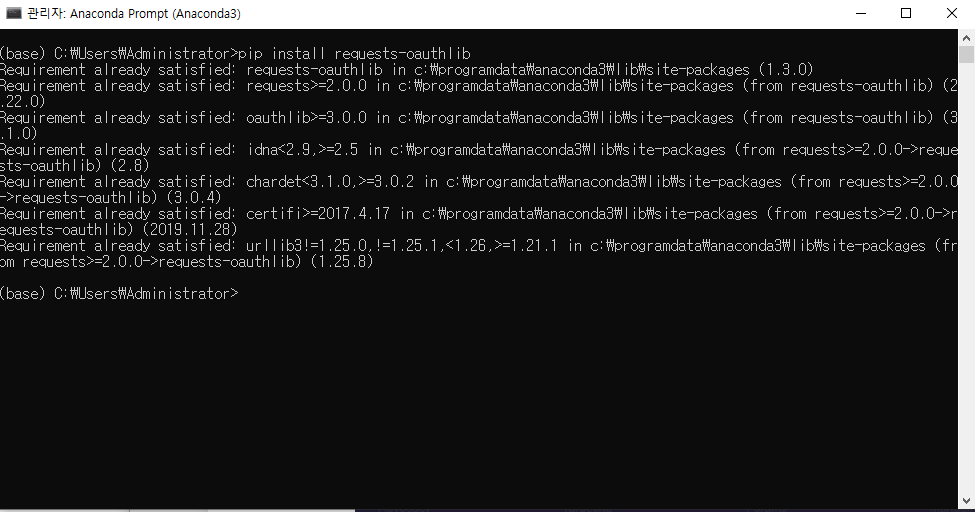

[Consumer API keys]

API key:xxxxxxx

API secret key:xxxxx

[Access token & access token secret]

Access token :xxxxx

Access token secret :xxx

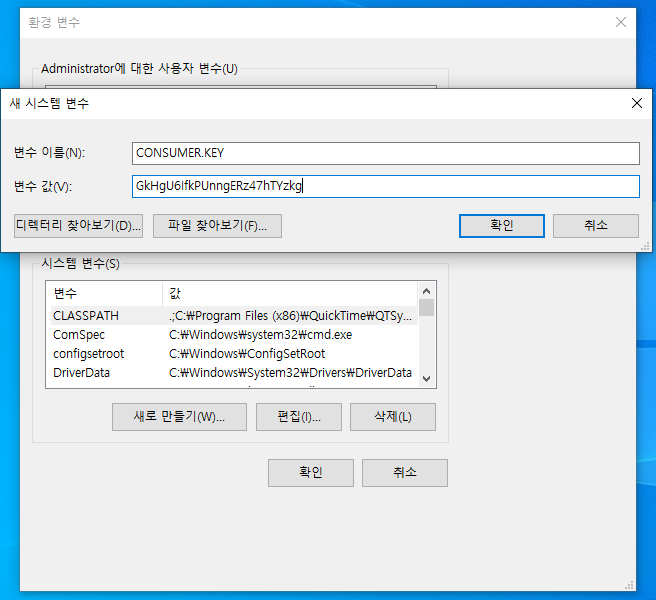

스크립트에 직접적으로 비밀 키를 적지 않아도 됩니다. 

스크립트를 깃허브에 공개 하더라도 아무 문제 없고, 다른 사람이 실행할 때도 스크립트를 수정할 필요 없이 환경변수만
수정해서 사용할 수 있다는 장점이 있음

In [2]:
!

예제 5.3 rest_api_with_requests_oauthlib.py - Requests-OAuthlib을 이용한 타임라인 추출

In [4]:
import os
from requests_oauthlib import OAuth1Session

# 환경변수에서 인증 정보를 추출합니다.
CONSUMER_KEY = os.environ['CONSUMER_KEY']
CONSUMER_SECRET = os.environ['CONSUMER_SECRET']
ACCESS_TOKEN = os.environ['ACCESS_TOKEN']
ACCESS_TOKEN_SECRET = os.environ['ACCESS_TOKEN_SECRET']

# 인증 정보를 사용해 OAuth1Session 객체를 생성합니다.
twitter = OAuth1Session(CONSUMER_KEY,
                        client_secret=CONSUMER_SECRET,
                        resource_owner_key=ACCESS_TOKEN,
                        resource_owner_secret=ACCESS_TOKEN_SECRET)

# 사용자의 타임라인을 추출합니다.
response = twitter.get('https://api.twitter.com/1.1/statuses/home_timeline.json')

# API 응답이 JSON 형식의 문자열이므로 response.json()으로 파싱합니다.
# status는 트윗(Twitter API에서는 Status라고 부릅니다)를 나타내는 dict입니다.
for status in response.json():
    # 사용자 이름과 트윗을 출력합니다.
    print('@' + status['user']['screen_name'], status['text'])

TypeError: string indices must be integers

### Tweepy로 트위터 REST API 사용하기

Tweepy를 사용해 사용자 타임라인의 내용을 추출하는 코드. 

Requests-OAuthlib을 사용한 코드와 비교하면 전체적인 흐름이 비슷하다는 것을 알 수 있음

다른 점을 찾아보면 REST API의 URL 지정이 home_timeline() 메서드로 추상화됐으며, 

트윗을 나타내는 객체가 diet가 아니라 Tweepy의 Status 객체라는 정도

#### 예제 5.4 rest_api_with_tweepy.py - Tweepy를 사용해 타임라인 추출하기

In [6]:
import os
# pip install tweepy
import tweepy

# 환경변수에서 인증 정보를 추출합니다.
CONSUMER_KEY = os.environ['CONSUMER_KEY']
CONSUMER_SECRET = os.environ['CONSUMER_SECRET']
ACCESS_TOKEN = os.environ['ACCESS_TOKEN']
ACCESS_TOKEN_SECRET = os.environ['ACCESS_TOKEN_SECRET']

# 인증 정보를 설정합니다.
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# API 클라이언트를 생성합니다.
api = tweepy.API(auth)

# 사용자의 타임라인을 추출합니다.
public_tweets = api.home_timeline()
for status in public_tweets:
    # 사용자 이름과 트윗을 출력합니다.
    print('@' + status.user.screen_name, status.text)

TweepError: [{'code': 32, 'message': 'Could not authenticate you.'}]

### Tweepy로 Twitter Streaming API 사용하기

Streaming API는 HTTP 요청을 보냈을 때 연결을 확립한 상태로 두고 서버에서 메시지를 계속 전송 받는 형태임

각 메시지는 줄바꿈 코드인 CRLF로 구분됨

메시지는 대부분 트윗을 나타내는 JSON 형식의 문자열이지만 트윗 이외에 연결을 유지하기 위한 공백과 메타 정보도 전송되기때문에, 이를 구분에서 적절하게 처리해야 함


연결은 다음과 같은 이유로 중간에 끊길 수 있습니다.

■ 같은 인증 정보로 너무 많은 연결을 확립할 경우

■ 클라이언트의 처리가 정지되거나 늦어진 경우

■ 트위터 서버 또는 연결에 변경이 있는 경우

Requests에서 get() 메서드와 post() 메서드의 매개변수에 stream=True를 지정하면 연결을 확립한 상태로 메시지를 처리할 수 있음. 

Tweepy를 사용하면 복잡한 메시지 처리를 따로 신경 쓰지 않을 수 있어 트윗을 처리하는 데만 집중할 수 있음

#### 예제 5.5 streaming_api_with_tweepy.py - Tweepy^. Streaming API

In [7]:
import os
import tweepy

# 환경변수에서 인증 정보를 추출합니다.
CONSUMER_KEY = os.environ['CONSUMER_KEY']
CONSUMER_SECRET = os.environ['CONSUMER_SECRET']
ACCESS_TOKEN = os.environ['ACCESS_TOKEN']
ACCESS_TOKEN_SECRET = os.environ['ACCESS_TOKEN_SECRET']

# 인증 정보를 설정합니다.
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
class MyStreamListener(tweepy.StreamListener):
    """
    Streaming API로 추출한 트윗을 처리하는 클래스입니다.
    """
    def on_status(self, status):
        """
        트윗을 받을 때 호출되는 메서드
        매개변수로 트윗을 나타내는 Status 객체가 전달됩니다.
        """
        print('@' + status.author.screen_name, status.text)
# 인증 정보와 StreamListener를 지정해서 Stream 객체를 추출합니다.
stream = tweepy.Stream(auth, MyStreamListener())

# 공개돼 있는 트윗을 샘플링한 스트림을 받습니다.
# 키워드 매개변수인 languages로 한국어 트윗만 추출합니다
stream.sample(languages=['ko'])

### [외부 예제] 실시간 트윗 크롤링하여 엑셀로 저장하기 with tweepy

In [6]:
# https://blog.naver.com/PostView.nhn?blogId=hs_715&logNo=221519052172&from=search&redirect=Log&widgetTypeCall=true&directAccess=false
# https://tweepy.readthedocs.io/en/v3.5.0/index.html

import tweepy
from tweepy import OAuthHandler, API
import pandas as pd

# 환경변수에서 인증 정보를 추출합니다.
CONSUMER_KEY = os.environ['CONSUMER_KEY']
CONSUMER_SECRET = os.environ['CONSUMER_SECRET']
ACCESS_TOKEN = os.environ['ACCESS_TOKEN']
ACCESS_TOKEN_SECRET = os.environ['ACCESS_TOKEN_SECRET']

# API 접근
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = API(auth)

# 키워드 입력받아서 트윗 검색
keyword = input('키워드를 입력하세요:')
max_tweets = 1500	#최대 검색 트윗 수
searched_tweets = []	#검색된 트윗 저장
last_id = -1

while len(searched_tweets) < max_tweets:
    count = max_tweets - len(searched_tweets)
    try:
        new_tweets = api.search(q=keyword, count=count)
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id

    except tweepy.TweepError as e:
        break               

# 트윗에서 정보 추출
name = []
id = []
mention = []
date = []
time = []

for tweet in searched_tweets:
    created_time = str(tweet.created_at)
    time_split = created_time.split()
    
    name.append(tweet.user.name)
    id.append('@' + tweet.user.screen_name)
    mention.append(tweet.text)
    date.append(time_split[0])
    time.append(time_split[1])
    
# 추출 정보로 딕셔너리 생성
data = {}
data['닉네임'] = name
data['ID'] = id
data['내용'] = mention
data['날짜'] = date
data['시간'] = time

# pandas로 데이터프레임 생성
df = pd.DataFrame(data)

# 결과를 엑셀 파일로 저장
addr = input('원하는 저장 경로를 입력하세요. (예: C:\) : ')
df.to_excel(addr + keyword + '.xlsx')
    

키워드를 입력하세요:한국자산관리공사
원하는 저장 경로를 입력하세요. (예: C:\) : c:\한국자산관리공사.xlsx


PermissionError: [Errno 13] Permission denied: 'c:\\한국자산관리공사.xlsx한국자산관리공사.xlsx'

## 5.2.2 유튜브에서 동영상 정보 수집하기

### API 키 추출하기

구글 계정으로 로그인한 상태에서 Google API Console(https://console.developers.google.com/)에 들어가서 새로운 프로젝트를 생성

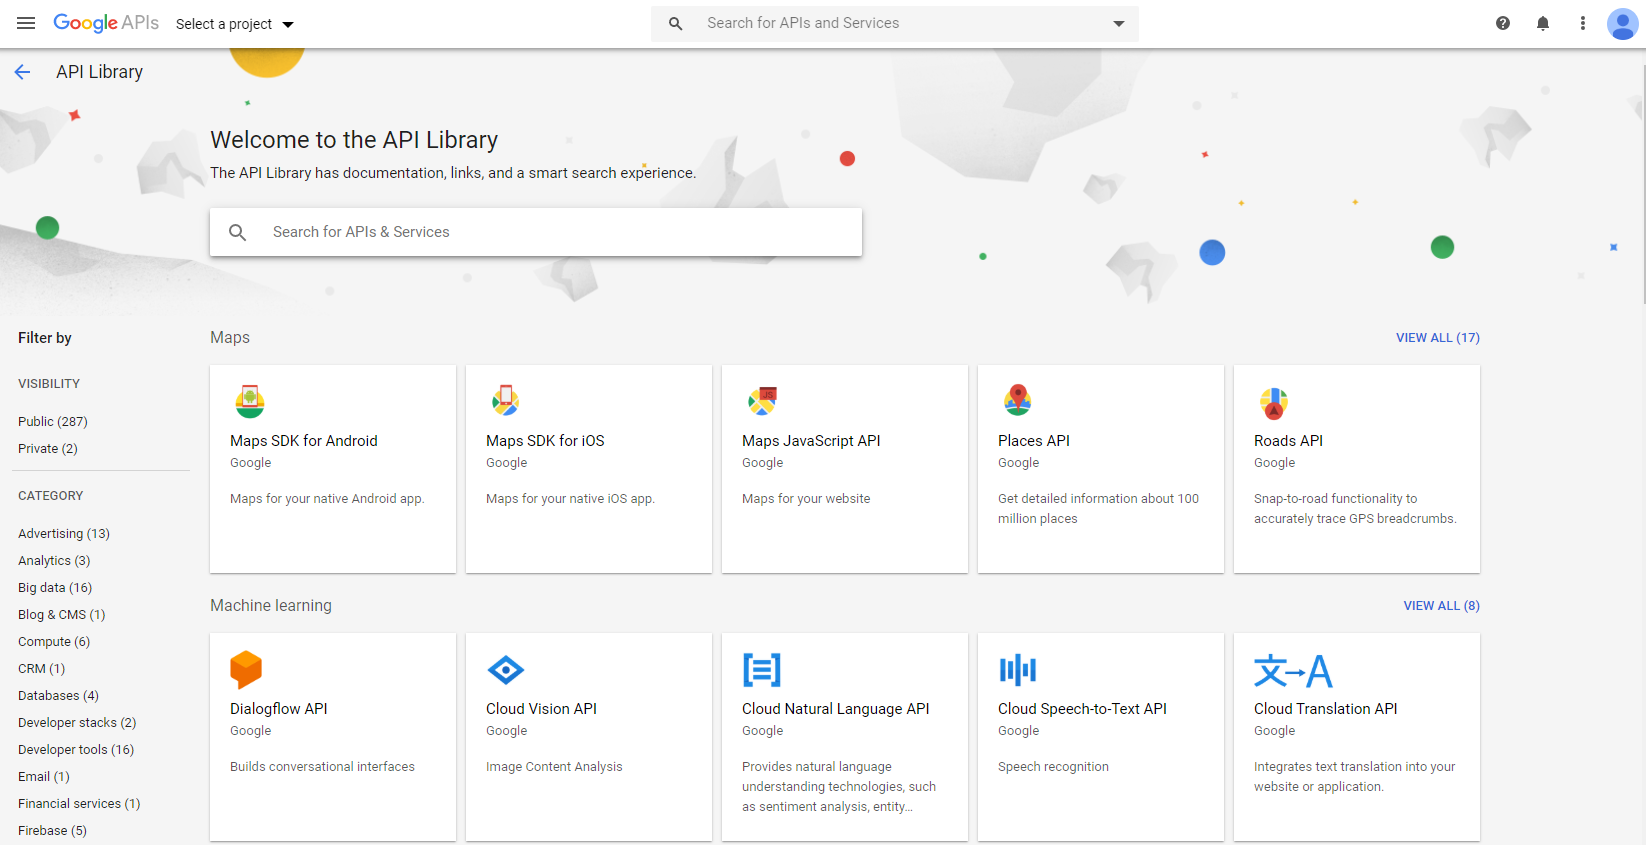

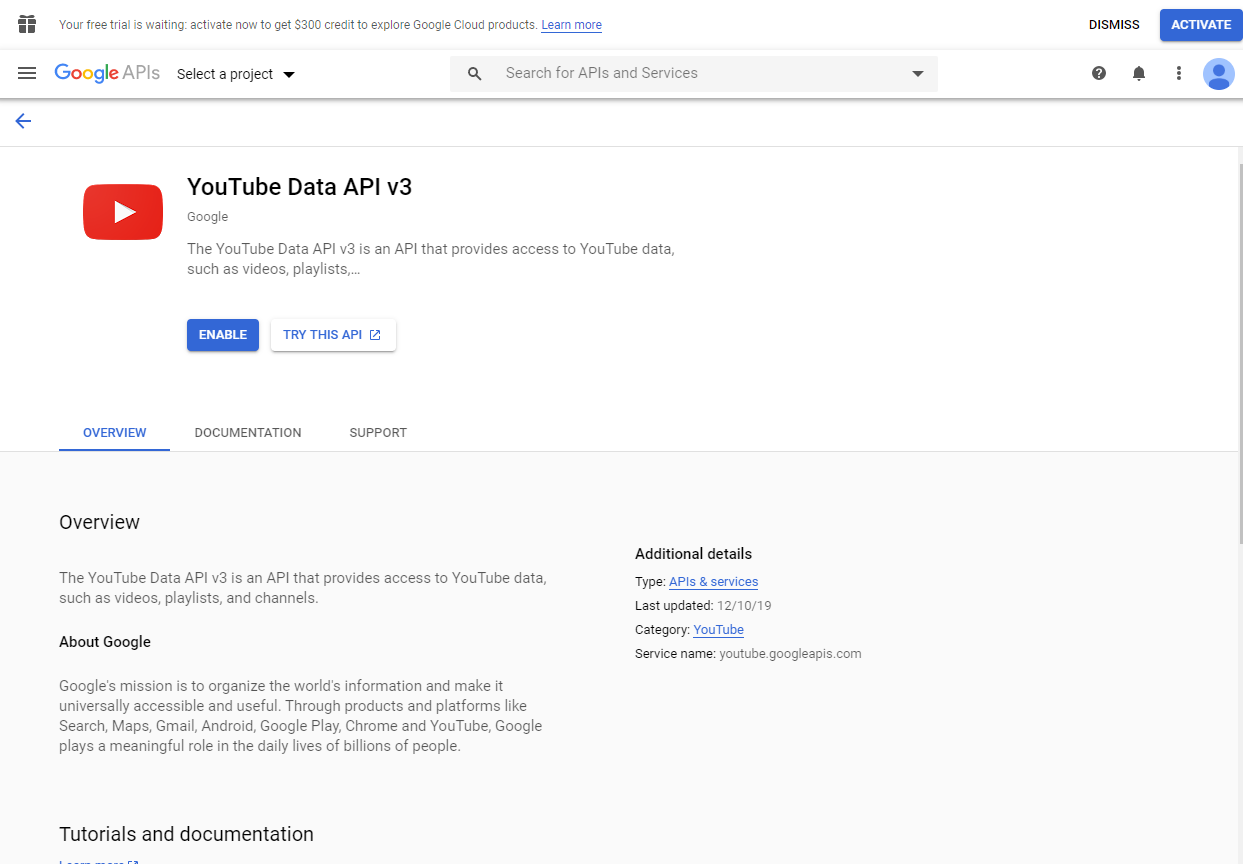

[사용자 인증 정보］ — ［API 키］를 눌러서 API 키를 생성

생성할 키의 종류를 ［서버 키로 선택하고, 적당한 이름을 설정

키가 생성되면 API 키가 출력

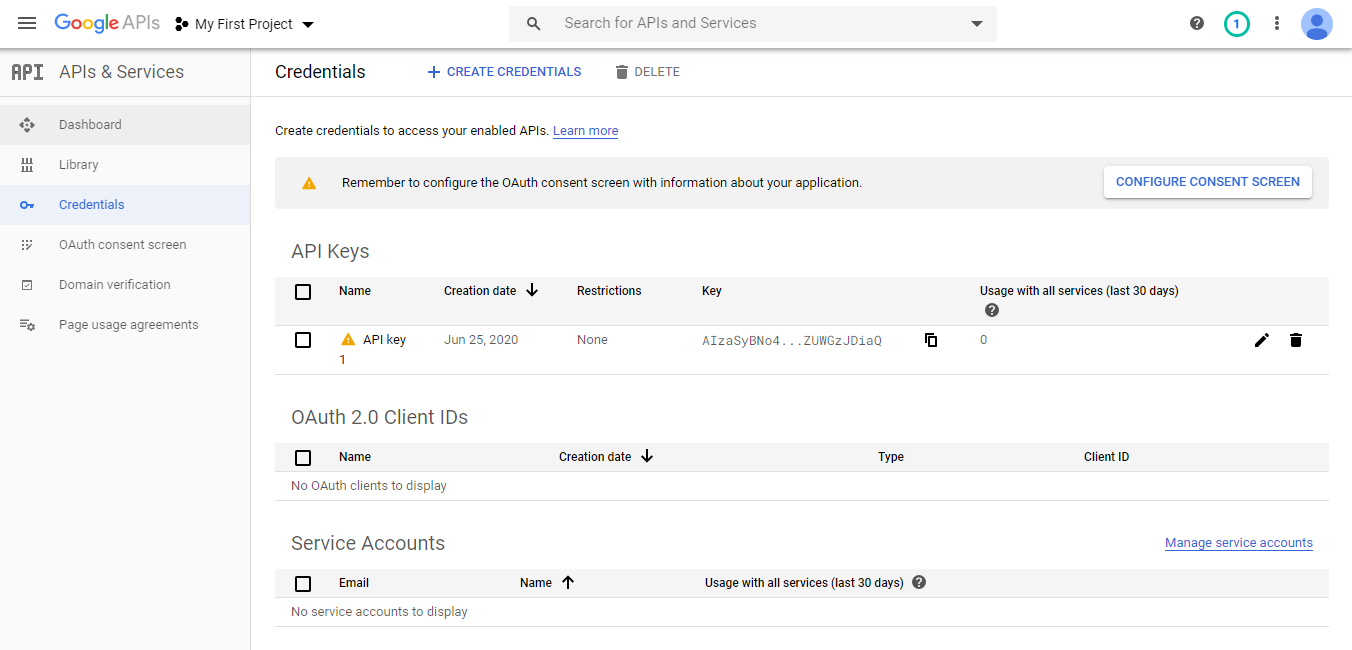

### Google API Client for Python 사용하기

pip install google-api-python-client

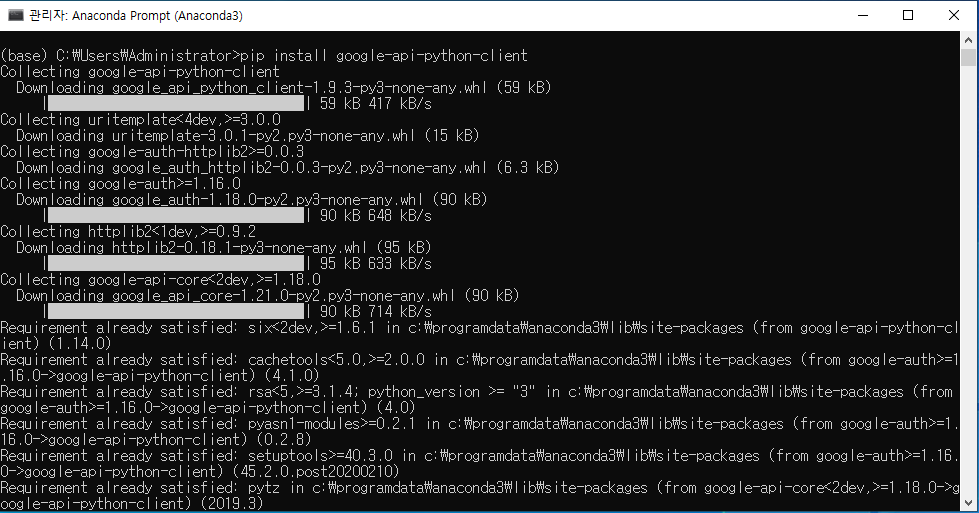

#### 예제 5.7 search_youtube_videos.py - 유튜브 동영상 검색하기

In [4]:
import os

# pip install google-api-python-client
from apiclient.discovery import build

# 환경변수에서 API 키 추출하기
YOUTUBE_API_KEY = os.environ['YOUTUBE_API_KEY']

# YouTube API 클라이언트를 생성합니다.
# build() 함수의 첫 번째 매개변수에는 API 이름
# 두 번째 매개변수에는 API 버전을 지정합니다.
# 키워드 매개변수 developerKey에는 API 키를 지정합니다.
# 이 함수는 내부적으로 https://www.googleapis.com/discovery/v1/apis/youtube/v3/rest라는
# URL에 접근하고 API 리소스와 메서드 정보를 추출합니다.
youtube = build('youtube', 'v3', developerKey=YOUTUBE_API_KEY)

# 키워드 매개변수로 매개변수를 지정하고
# search.list 메서드를 호출합니다.
# list() 메서드를 실행하면 googleapiclient.http.HttpRequest가 반환됩니다. 
# execute() 메서드를 실행하면 실제 HTTP 요청이 보내지며, API 응답이 반환됩니다.
search_response = youtube.search().list(
    part='snippet',
    q='뷰티',
    type='video',
).execute()

# search_response는 API 응답을 JSON으로 나타낸 dict 객체입니다.
for item in search_response['items']:
    # 동영상 제목을 출력합니다.
    print(item['snippet']['title'])

당신이 시도해야 할 멋진 뷰티 도구 22가지
[밀크팡] 캐치티니핑｜뷰티스파｜하츄핑｜공주님｜메이크업｜변신｜네일｜키즈뷰티｜어린이 화장품｜하츄핑과 함께 뷰티스파로~ 공주님 변신!⭐
[차홍뷰티] 여름철 단발머리묶기 | Bob hair styling for summer
[Eng] 뷰티 n년차 이사배의 파우더룸 최⭐️초⭐️공⭐️개! l 이사배(RISABAE Makeup)
도와줘요! 떡진머리 소생템 모음 [#다다뷰티]


# 5.3 시계열 데이터 수집하고 활용하기

환율, 국채 금리 등의 시계열 데이터를 검색하고 활용하는 방법

시계열 데이터는 일반적으로 그래프로 시각화하면 쉽게 이해 가능

파이썬으로 그래프를 그 릴 때는 일반적으로 matplotlib을 사용

matplotlib을 사용하면 수치 해석 전용 소프트웨어인 MATLAB과 비슷한 인터페이스로 다양한 그래프 표현 가능

사용할 데이터는 FRED Economics Data에서 제공하는 환율 CSV 파일

## 5.3.1 환율 데이터 수집

FRED Economic Data에서 환율 데이터를 다운로드

https://fred.stlouisfed.org/series/DEXKOUS

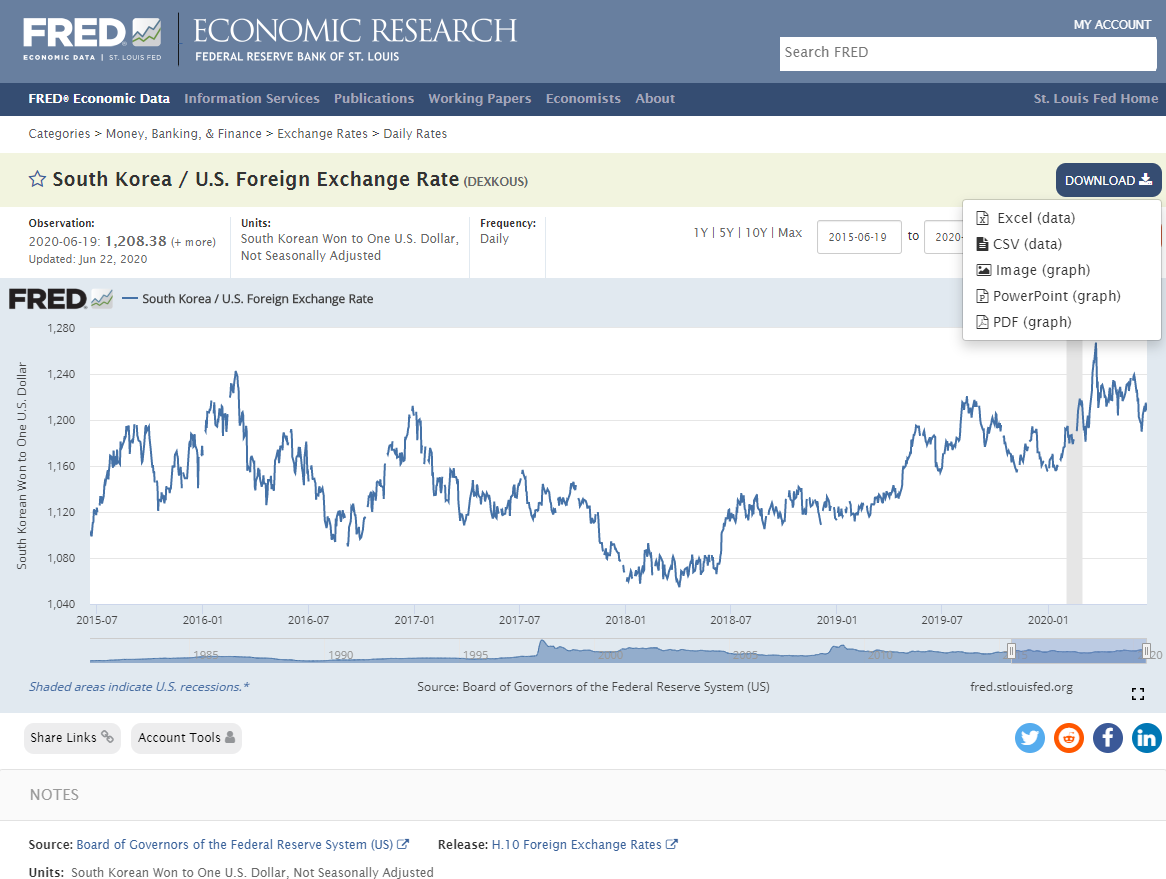

## 5.3.2 pandas와 CSV 파일

CSV/Excel 파일을 읽고, pandas로 필요한 부분을 추출

pandas는 데이터 분석을 위한 데이터 구조와 도구를 제공하는 라이브러리

내부적으로 수치 계산을 위해 NumPy 라이브러리를 사용하며, 굉장히 빠르게 동작

### pandas 기초 지식

pandas를 설치

pip install pandas

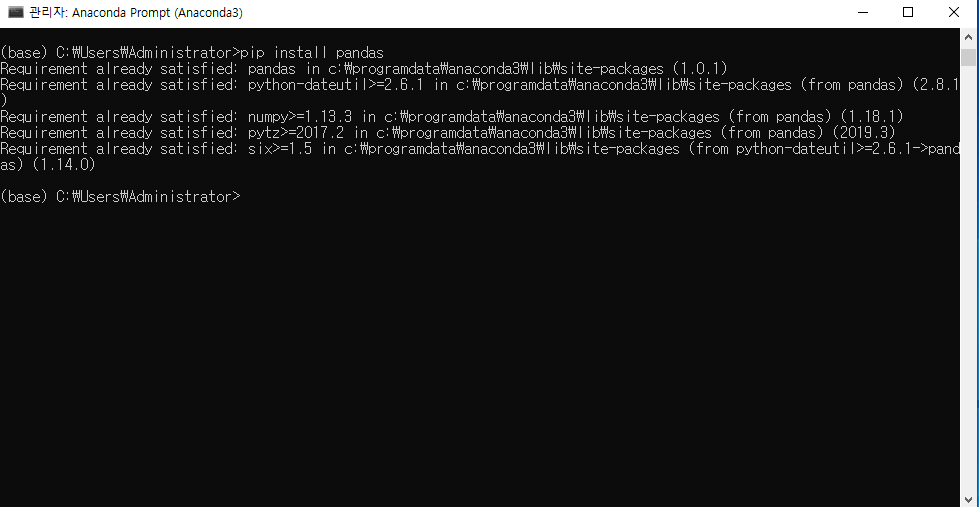

In [33]:
# pandas를 pd라는 이름으로 임포트
import pandas as pd     

# Series 생성자에 list를 전달해서 인스턴스를 생성
s1 = pd.Series([4, -2, 5])     
s1

0    4
1   -2
2    5
dtype: int64

In [34]:
# index 속성으로 인덱스 배열을 추출
pd.RangeIndex(start=0, stop=3, step=1)

RangeIndex(start=0, stop=3, step=1)

In [35]:
# 인덱스 배열은 반복 가능한 객체
list(s1.index)

[0, 1, 2]

In [36]:
# values 속성으로 값의 배열을 추출
s1.values

array([ 4, -2,  5], dtype=int64)

In [37]:
# 값의 배열은 반복 가능한 객체
list(s1 .values)

[4, -2, 5]

In [38]:
# 인덱스를 지정해서 시리즈를 생성할 수 있음
s2 = pd.Series([4, -2, 5], index=['a', 'b', 'c'])
s2

a    4
b   -2
c    5
dtype: int64

In [39]:
s2.index

Index(['a', 'b', 'c'], dtype='object')

In [42]:
# 인덱스의 값을 키로 diet처럼 값을 추출/설정할 수 있음
s2['c'] =2
s2

a    4
b   -2
c    2
dtype: int64

In [46]:
# 데이터프레임은 2차원 배열. 표 형식의 데이터
# 딕셔너리 형식처럼 키로 레이블을 나타내고, 내부의 값은 시리즈 형식처럼 사용

### CSV 파일 읽어 들이기

In [8]:
# pandas를 여라는 이름으로 임포트합니다.

import pandas as pd

# read_csv() 함수의 첫 번째 매개변수에는 파일 경로, URL, 파일 객체 등을 지정합니다.

DEXKOUS_csv = pd.read_csv('DEXKOUS.csv')
DEXKOUS_csv

DATE  DEXKOUS
0      1981-04-13   675.40
1      1981-04-14   676.70
2      1981-04-15   676.70
3      1981-04-16   676.70
4      1981-04-17   676.75
...           ...      ...
10220  2020-06-15  1212.21
10221  2020-06-16  1207.26
10222  2020-06-17  1215.02
10223  2020-06-18  1211.65
10224  2020-06-19  1208.38

[10225 rows x 2 columns]

In [59]:
DEXKOUS_csv.shape # number of rows, columns

(1306, 2)

### 엑셀 파일읽기

#### 국가통계 포털 - 주제별 통계［고용，노동, 임금］

#### xlrd 설치

pip install xlrd

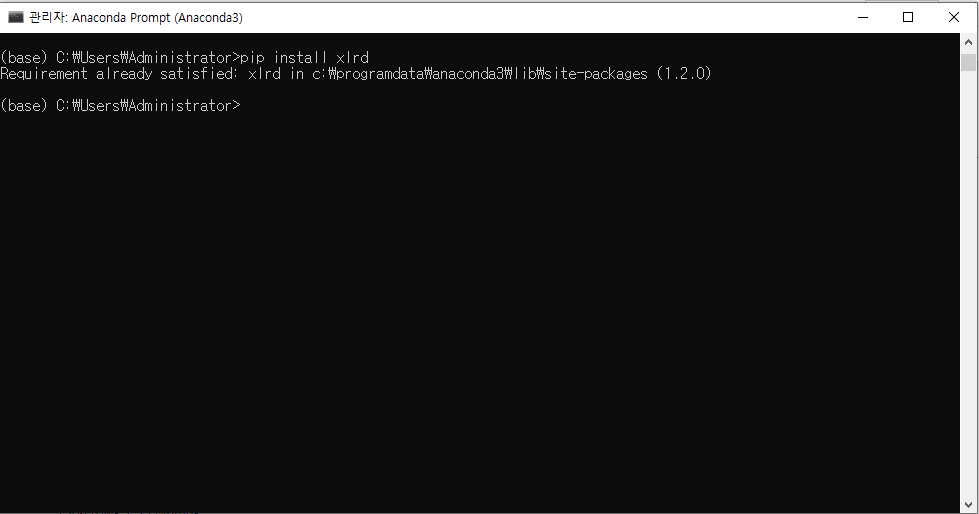

연령별 경제활동인구 총괄 자료 다운로드

http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1DA7012S&vw_cd=MT_ZTITLE&list_id=B11&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

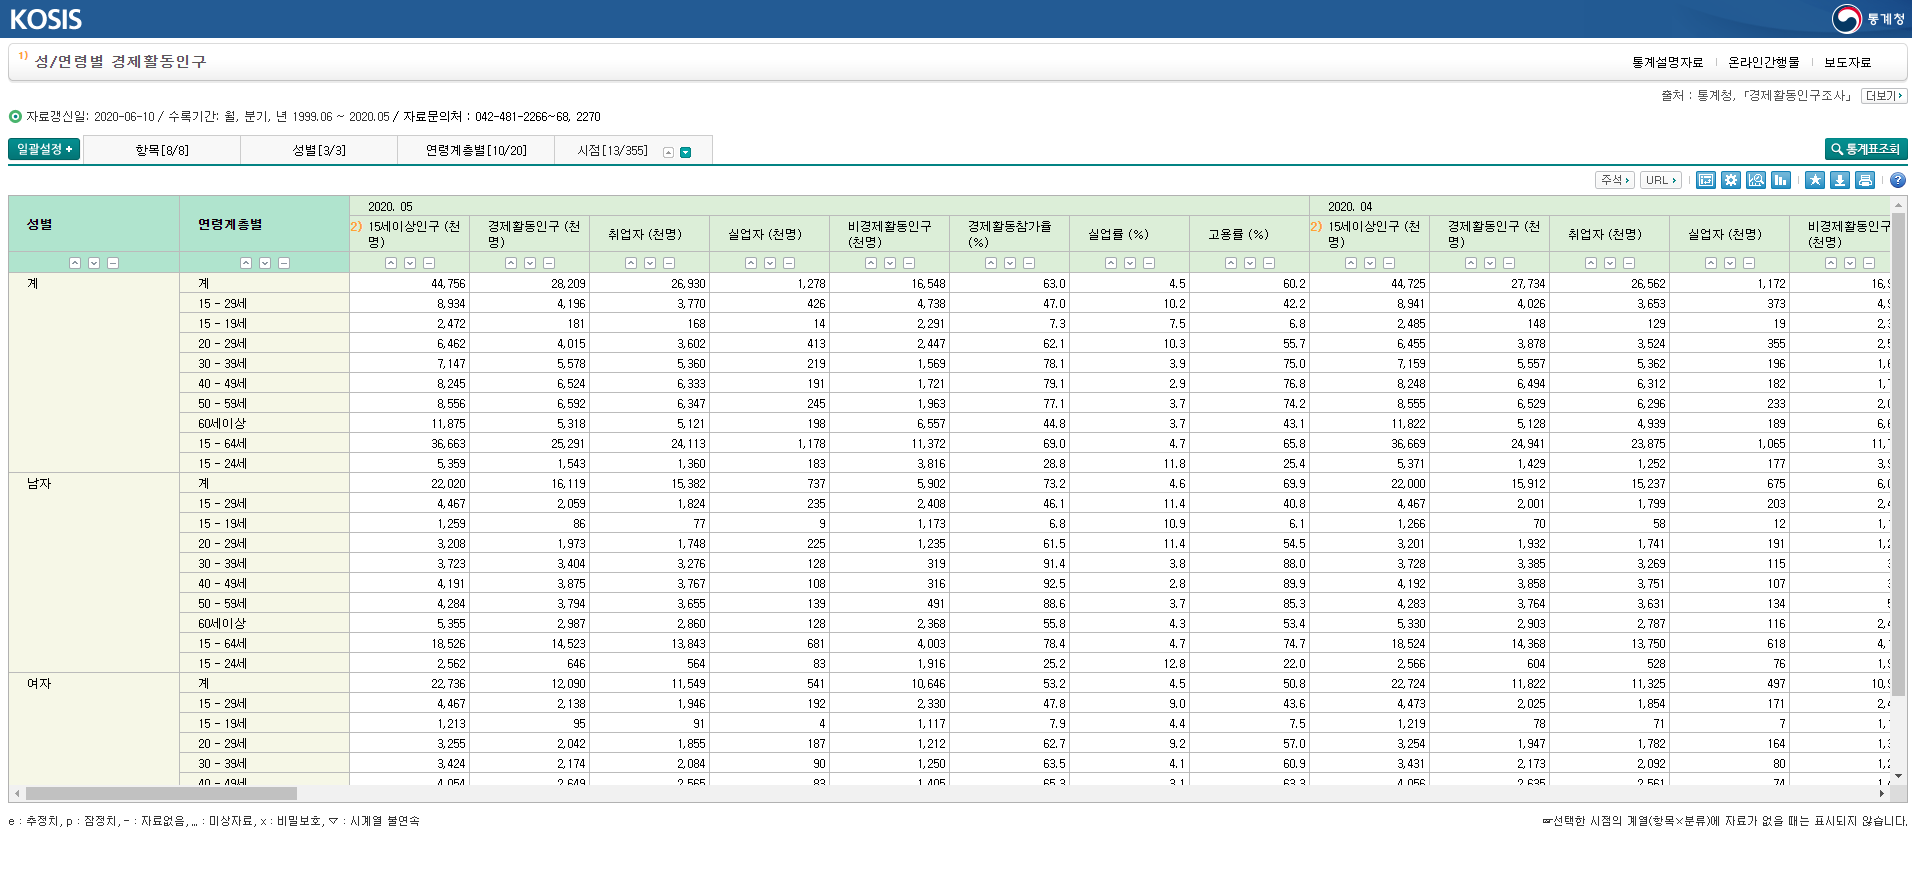

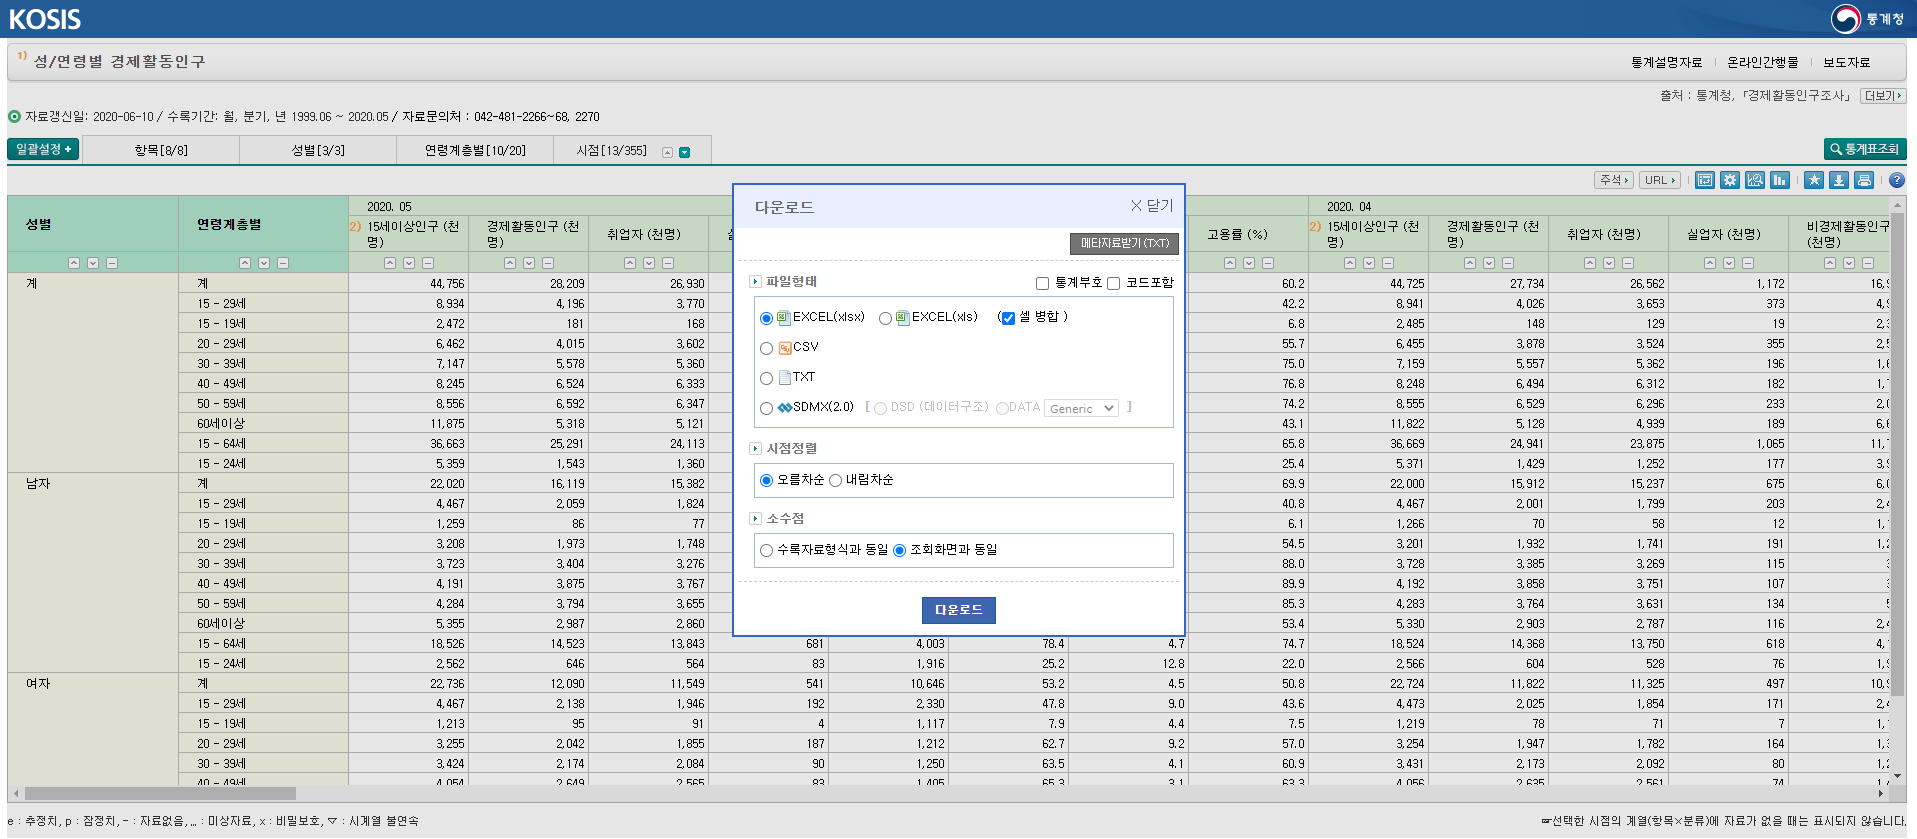

파일 이름 변경 --> gugik.xlsx

데이터 분석 예제

In [1]:
import pandas as pd

# read_excel() 메서드로 엑셀 파일을 읽어 들입니다.

df_jobs = pd.read_excel("gugik.xlsx")

df_jobs

성별     연령계층별      2019. 05   2019. 05.1 2019. 05.2 2019. 05.3  \
0    성별     연령계층별  15세이상인구 (천명)  경제활동인구 (천명)   취업자 (천명)   실업자 (천명)   
1     계         계         44460        28468      27322       1145   
2   NaN  15 - 29세          9073         4390       3953        437   
3   NaN  15 - 19세          2639          234        217         17   
4   NaN  20 - 29세          6434         4157       3736        420   
5   NaN  30 - 39세          7292         5758       5543        214   
6   NaN  40 - 49세          8304         6682       6519        163   
7   NaN  50 - 59세          8543         6659       6488        171   
8   NaN     60세이상         11248         4979       4819        160   
9   NaN  15 - 64세         36807        25774      24692       1082   
10  NaN  15 - 24세          5564         1663       1478        186   
11   남자         계         21859        16225      15535        690   
12  NaN  15 - 29세          4536         2169       1937        232   
13  NaN  15 - 19세          1348          126        114         12   
14  NaN  20 - 29세          3188         2043       1823        220   
15  NaN  30 - 39세          3784         3505       3372        133   
16  NaN  40 - 49세          4215         3938       3837        101   
17  NaN  50 - 59세          4270         3800       3692        109   
18  NaN     60세이상          5054         2812       2698        115   
19  NaN  15 - 64세         18574        14748      14103        645   
20  NaN  15 - 24세          2670          711        630         81   
21   여자         계         22601        12243      11788        455   
22  NaN  15 - 29세          4537         2221       2017        205   
23  NaN  15 - 19세          1291          108        103          4   
24  NaN  20 - 29세          3246         2114       1914        200   
25  NaN  30 - 39세          3508         2252       2171         81   
26  NaN  40 - 49세          4089         2744       2683         62   
27  NaN  50 - 59세          4274         2859       2796         63   
28  NaN     60세이상          6193         2167       2121         45   
29  NaN  15 - 64세         18233        11026      10589        437   
30  NaN  15 - 24세          2894          952        848        104   

      2019. 05.4   2019. 05.5 2019. 05.6 2019. 05.7    ...     2020. 04.6  \
0   비경제활동인구 (천명)  경제활동참가율 (%)    실업률 (%)    고용률 (%)    ...        실업률 (%)   
1          15992           64          4       61.5    ...            4.2   
2           4683         48.4        9.9       43.6    ...            9.3   
3           2405          8.9        7.1        8.2    ...           12.7   
4           2277         64.6       10.1       58.1    ...            9.1   
5           1534           79        3.7         76    ...            3.5   
6           1623         80.5        2.4       78.5    ...            2.8   
7           1884         77.9        2.6       75.9    ...            3.6   
8           6269         44.3        3.2       42.8    ...            3.7   
9          11034           70        4.2       67.1    ...            4.3   
10          3900         29.9       11.2       26.6    ...           12.4   
11          5634         74.2        4.3       71.1    ...            4.2   
12          2367         47.8       10.7       42.7    ...           10.1   
13          1222          9.4        9.7        8.5    ...           17.4   
14          1146         64.1       10.8       57.2    ...            9.9   
15           279         92.6        3.8       89.1    ...            3.4   
16           277         93.4        2.6         91    ...            2.8   
17           469           89        2.9       86.5    ...            3.6   
18          2242         55.6        4.1       53.4    ...              4   
19          3826         79.4        4.4       75.9    ...            4.3   
20          1959         26.6       11.4       23.6    ...           12.5   
21         10358         54.2        3.7       52.2    ...            

stackO 함수로 행과 열을 바꿀 수 있습니다. 9번째에 실업률이 있으므로 [8]기로 꺼냅니다.

In [2]:
df_jobs.stack()[9]

연령계층별         15 - 64세
2019. 05         36807
2019. 05.1       25774
2019. 05.2       24692
2019. 05.3        1082
2019. 05.4       11034
2019. 05.5          70
2019. 05.6         4.2
2019. 05.7        67.1
2019. 06         36818
2019. 06.1       25802
2019. 06.2       24731
2019. 06.3        1071
2019. 06.4       11016
2019. 06.5        70.1
2019. 06.6         4.2
2019. 06.7        67.2
2019. 07         36814
2019. 07.1       25766
2019. 07.2       24720
2019. 07.3        1046
2019. 07.4       11048
2019. 07.5          70
2019. 07.6         4.1
2019. 07.7        67.1
2019. 08         36793
2019. 08.1       25485
2019. 08.2       24668
2019. 08.3         817
2019. 08.4       11308
                ...   
2020. 02.2       24339
2020. 02.3        1008
2020. 02.4       11372
2020. 02.5          69
2020. 02.6           4
2020. 02.7        66.3
2020. 03         36695
2020. 03.1       25044
2020. 03.2       23982
2020. 03.3        1062
2020. 03.4       11650
2020. 03.5        68.3
2020. 03.6 

In [3]:
output = []
stacked = df_jobs.stack()[8]
for index in stacked.index:
    output.append([index, stacked[index]])
output    

[['연령계층별', '60세이상'],
 ['2019. 05', 11248],
 ['2019. 05.1', 4979],
 ['2019. 05.2', 4819],
 ['2019. 05.3', 160],
 ['2019. 05.4', 6269],
 ['2019. 05.5', 44.3],
 ['2019. 05.6', 3.2],
 ['2019. 05.7', 42.8],
 ['2019. 06', 11292],
 ['2019. 06.1', 5035],
 ['2019. 06.2', 4883],
 ['2019. 06.3', 152],
 ['2019. 06.4', 6257],
 ['2019. 06.5', 44.6],
 ['2019. 06.6', 3],
 ['2019. 06.7', 43.2],
 ['2019. 07', 11345],
 ['2019. 07.1', 5004],
 ['2019. 07.2', 4873],
 ['2019. 07.3', 131],
 ['2019. 07.4', 6341],
 ['2019. 07.5', 44.1],
 ['2019. 07.6', 2.6],
 ['2019. 07.7', 42.9],
 ['2019. 08', 11398],
 ['2019. 08.1', 5002],
 ['2019. 08.2', 4901],
 ['2019. 08.3', 101],
 ['2019. 08.4', 6397],
 ['2019. 08.5', 43.9],
 ['2019. 08.6', 2],
 ['2019. 08.7', 43],
 ['2019. 09', 11451],
 ['2019. 09.1', 5045],
 ['2019. 09.2', 4931],
 ['2019. 09.3', 114],
 ['2019. 09.4', 6406],
 ['2019. 09.5', 44.1],
 ['2019. 09.6', 2.3],
 ['2019. 09.7', 43.1],
 ['2019. 10', 11504],
 ['2019. 10.1', 5110],
 ['2019. 10.2', 4996],
 ['2019. 10.

## 5.3.3 그래프로 시각화하기

matplotlib을 설치

pip install matplotlib

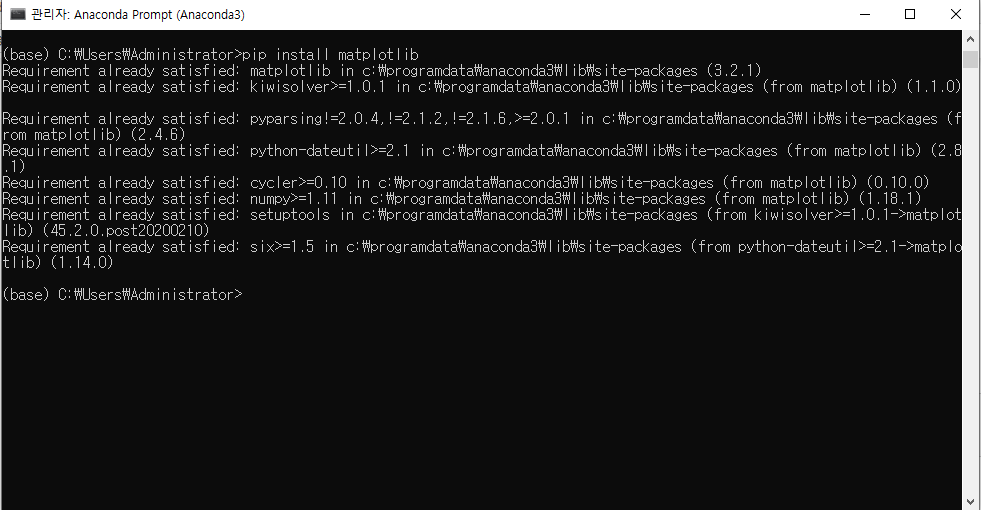

한국어 폰트 설치

http://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221225208497

In [9]:
# 폰트 설정 방법 1
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


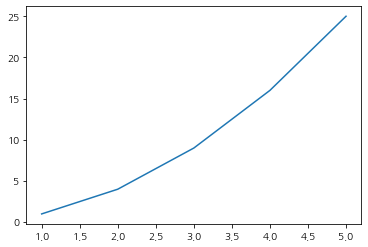

In [10]:
# matplotlib.pyplot 모듈을 pit라는 이름으로 임포트합니다.

import matplotlib.pyplot as pit

# Plot() 함수로 X축과 Y축의 값을 리스트로 지정해서 그래프를 그립니다.
pit.plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25])

# showO 함수로 그래프를 출력합니다.
pit.show()

#### 예제 5.11 plot_advanced_graph.py - 다양한 매개변수를 지정해서 그래프 그리기

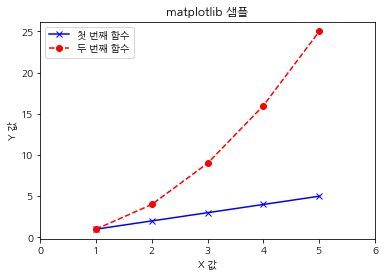

In [11]:
import matplotlib

# 렌더링 백엔드로 데스크톱 환경이 필요 없는 Agg를 사용합니다.
matplotlib.use('Agg')

# 한국어를 렌더링할 수 있게 폰트를 지정합니다.
# macOS와 우분투 모두 정상적으로 출력하도록 2개의 폰트를 지정했습니다.
# 기본 상태에서는 한국어가 □로 출력됩니다.
matplotlib.rcParams['font.sans-serif'] = 'NanumGothic,AppleGothic'
import matplotlib.pyplot as plt

# plot()의 세 번째 매개변수로 계열 스타일을 나타내는 문자열을 지정합니다.
# 'b'는 파란색, 'x'는 × 표시 마커, '-'는 마커를 실선으로 연결하라는 의미입니다.
# 키워드 매개변수 label로 지정한 계열의 이름은 범례로 사용됩니다.
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], 'bx-', label='첫 번째 함수')

# 'r'은 붉은색,'o'는 ○ 표시 마커, '--'는 점선을 의미합니다.
plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25], 'ro--', label='두 번째 함수')
# xlabel() 함수로 X축의 레이블을 지정합니다.
plt.xlabel('X 값')
# ylabel() 함수로 Y축의 레이블을 지정합니다.
plt.ylabel('Y 값')
# title() 함수로 그래프의 제목을 지정합니다.
plt.title('matplotlib 샘플')
# legend() 함수로 범례를 출력합니다. loc='best'는 적당한 위치에 출력하라는 의미입니다.
plt.legend(loc='best')

# X축 범위를 0~6으로 지정합니다. ylim() 함수를 사용하면 Y축 범위를 지정할 수 있습니다.
plt.xlim(0, 6)

# 그래프를 그리고 파일로 저장합니다.
plt.savefig('advanced_graph.png', dpi=300)

https://jinyes-tistory.tistory.com/70

In [2]:
matplotlib.get_cachedir()

'C:\\Users\\Youngwoo\\.matplotlib'

### 읽어 들인 데이터로 그래프 그리기

예제 5.12 plot_historical_data.py - 데이터 시각화하기

       0       1
0   2000  5212.0
1   2001  5433.0
2   2002  5669.0
3   2003  5886.0
4   2004  6077.0
5   2005  6266.0
6   2006  6467.0
7   2007  6726.0
8   2008  7011.0
9   2009  7293.0
10  2010  7571.0
11  2011  7827.0
12  2012  8142.0
13  2013  8468.0
14  2014  8831.0


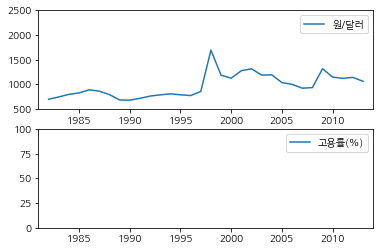

In [12]:
from datetime import datetime
import pandas as pd
import matplotlib

matplotlib.use('Agg') 
matplotlib.rcParams['font.sans-serif'] = 'NanumGothic,AppleGothic' 
import matplotlib.pyplot as plt

def main():
    # 1981년과 2014년 사이의 환율과 고용률을 출력해 봅니다. 
    # 조금 이해하기 쉽게 Pandas 대신 기본 숫자 비교와 문자열 비교를 사용해 봤습니다.
    # 환율 정보 읽어 들이기
    df_exchange = pd.read_csv('DEXKOUS.csv', header=1, 
        names=['DATE', 'DEXKOUS'], skipinitialspace=True, index_col=0)
    years = {}
    output = []
    for index in df_exchange.index:
        year = int(index.split('-')[0])
        if (year not in years) and (1981 < year < 2014):
            if df_exchange.DEXKOUS[index] != ".":
                years[year] = True
                output.append([year, float(df_exchange.DEXKOUS[index])])
    df_exchange = pd.DataFrame(output)

    # 고용률 통계를 구합니다.
    df_jobs = pd.read_excel('gugik.xlsx') 
    output = []
    stacked = df_jobs.stack()[8]
    for index in stacked.index:
        try:
            if 1981 <= int(index) <= 2014:
                output.append([int(index), float(stacked[index])])
        except:
            pass
    s_jobs = pd.DataFrame(output)

    # 첫 번째 그래프 그리기
    plt.subplot(2, 1, 1)
    plt.plot(df_exchange[0], df_exchange[1], label='원/달러') 
    plt.xlim(1981, 2014) # X축의 범위를 설정합니다.
    plt.ylim(500, 2500)
    plt.legend(loc='best')
    
    # 두 번째 그래프 그리기
    print(s_jobs)
    plt.subplot(2, 1, 2) 
    plt.plot(s_jobs[0], s_jobs[1], label='고용률(%)') 
    plt.xlim(1981, 2014) # X축의 범위를 설정합니다.
    plt.ylim(0, 100) # Y축의 범위를 설정합니다.
    plt.legend(loc='best')
    plt.savefig('historical_data.png', dpi=300) # 이미지를 저장합니다.

if __name__ == '__main__': 
    main()

# 5.4 열린 데이터 수집과 활용

최근에는 정부，자치단체, 기업 등이 자신들이 보유하고 있는 데이터를 "열린 데이터”라는 이름으로 공개

열린 데이터에서 자주 사용되는 자료형 가운데 PDF, Linked Open Data를 사용하는 방법

[표5.4] 한국에서 사용할 수 있는 열린 데이터의 예

## 5.4.2 PDF 에서 데이터 추출하기

우리은행 _ 일일 국제 금융 시장 속보

https：//spot.wooribank.com/pot/Dream?withyou=FXXRT0027

"woori.pdf” 이름으로 변경

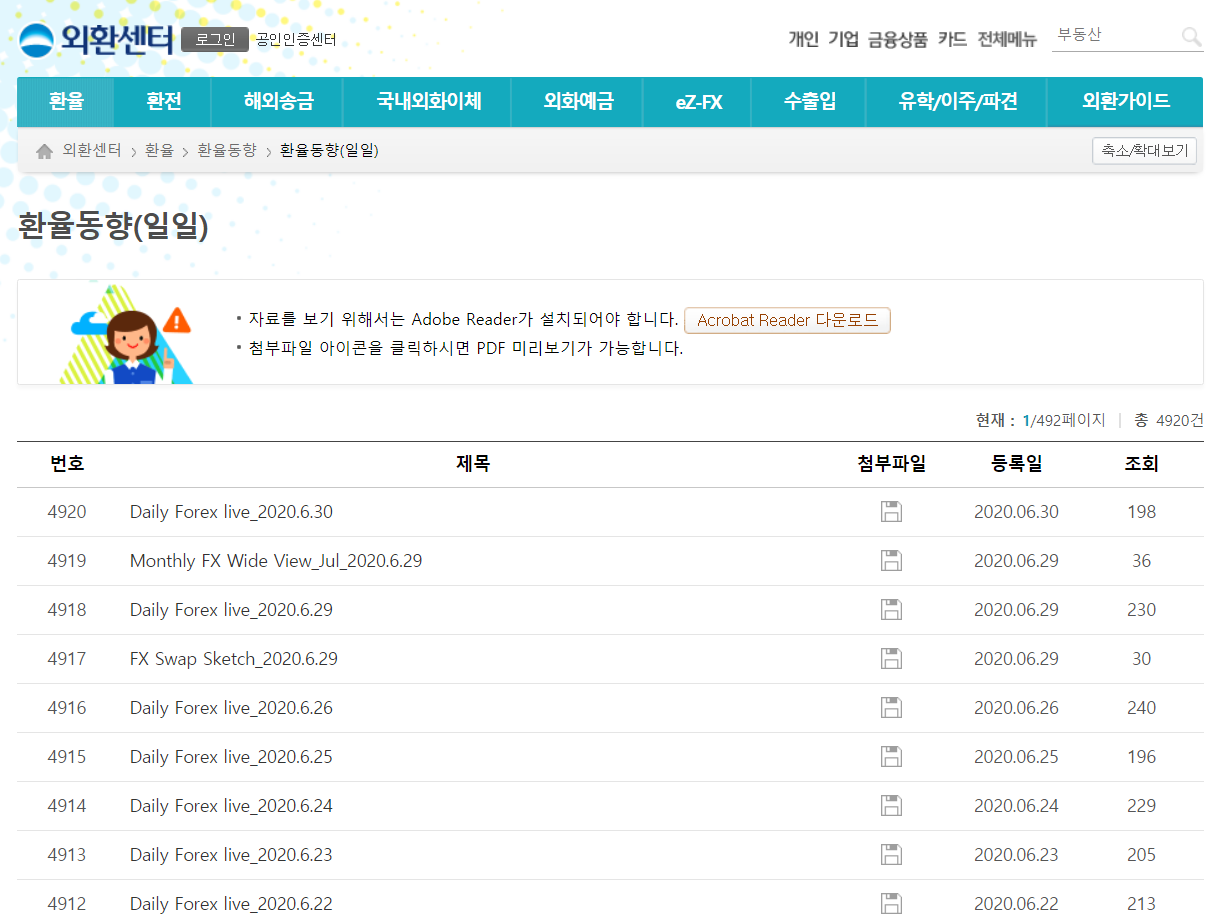

### PDFMiner.six로 PDF에서 텍스트 추출

파이선으로 PDF에서 텍스트를 추출할 때는 PDFMiner.six 를 사용

https://lsjsj92.tistory.com/304

https://lsjsj92.tistory.com/304?category=753579

pip3 install pdfminer.six

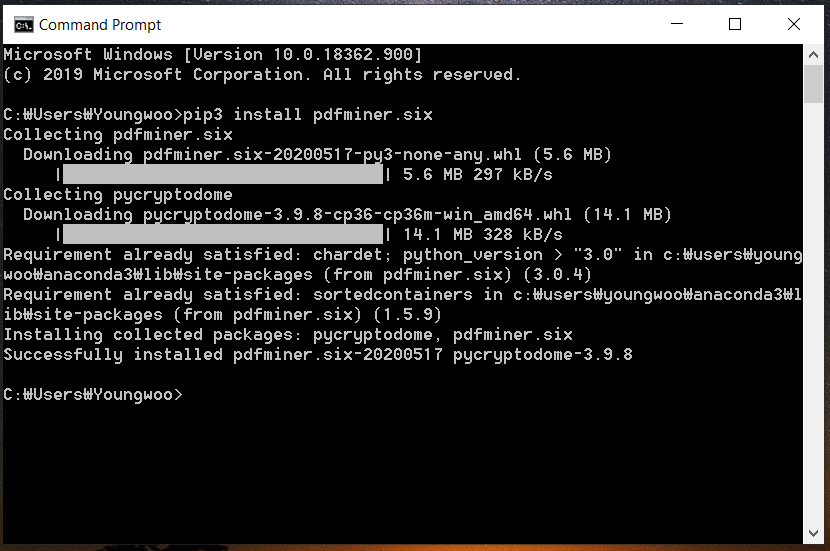

5.13 print_pdf_textboxes.py - PDF를 파싱해서 텍스트 박스의 내용 출력하기

In [3]:
import sys
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTContainer, LTTextBox
from pdfminer.pdfinterp import PDFPageInterpreter, PDFResourceManager
from pdfminer.pdfpage import PDFPage

def find_textboxes_recursively(layout_obj):
    """
    재귀적으로 텍스트 박스(LTTextBox)를 찾고
    텍스트 박스들을 리스트로 반환합니다.
    """
    # LTTextBox를 상속받은 객체의 경우 리스트에 곧바로 넣어서 반환합니다.
    if isinstance(layout_obj, LTTextBox):
        return [layout_obj]
    # LTContainer를 상속받은 객체의 경우 자식 요소를 포함하고 있다는 의미이므로
    # 재귀적으로 자식 요소를 계속 찾습니다.
    if isinstance(layout_obj, LTContainer):
        boxes = []
        for child in layout_obj:
            boxes.extend(find_textboxes_recursively(child))
        return boxes
    # 아무것도 없다면 빈 리스트를 반환합니다.
    return []

# 공유 리소스를 관리하는 리소스 매니저를 생성합니다.
laparams = LAParams()
resource_manager = PDFResourceManager()

# 페이지를 모으는 PageAggregator 객체를 생성합니다.
device = PDFPageAggregator(resource_manager, laparams=laparams)

# Interpreter 객체를 생성합니다.
interpreter = PDFPageInterpreter(resource_manager, device)

# 파일을 바이너리 형식으로 읽어 들입니다.
with open(sys.argv[1], 'rb') as f:
    # PDFPage.get_pages()로 파일 객체를 지정합니다.
    # PDFPage 객체를 차례대로 추출합니다.
    # 키워드 매개변수인 pagenos로 처리할 페이지 번호(0-index)를 리스트 형식으로 지정할 수도 있습니다.
    for page in PDFPage.get_pages(f):
        # 페이지를 처리합니다.
        interpreter.process_page(page)
        # LTPage 객체를 추출합니다.
        layout = device.get_result()
        # 페이지 내부의 텍스트 박스를 리스트로 추출합니다.
        boxes = find_textboxes_recursively(layout)
        # 텍스트 박스를 왼쪽 위의 좌표부터 차례대로 정렬합니다.
        # y1(Y 좌표)는 위에 있을수록 크므로 음수로 변환하게 해서 비교했습니다.
        boxes.sort(key=lambda b: (-b.y1, b.x0))
        for box in boxes:
            # 읽기 쉽게 선을 출력합니다.
            print('-' * 10)
            # 텍스트 박스의 내용을 출력합니다.
            print(box.get_text().strip())

FileNotFoundError: [Errno 2] No such file or directory: '-f'

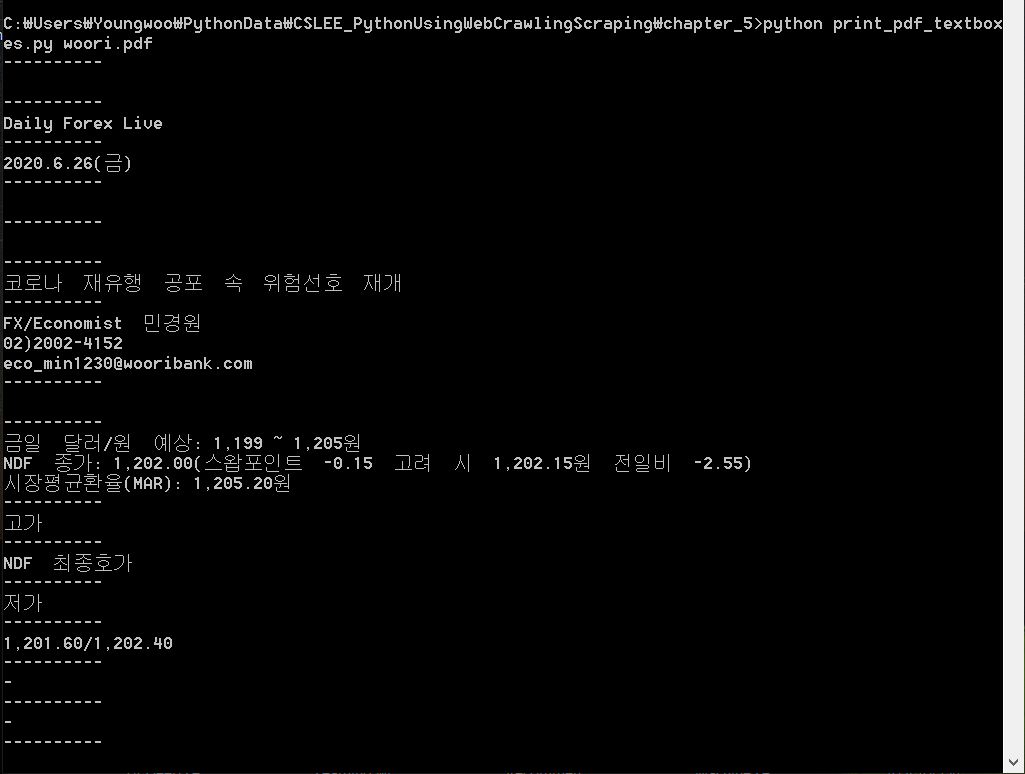

# 5.5	웹 페이지 자동 조작

자동 조작이란 브라우저를 조작하는 것처럼 실제로 웹 페이지 에 조작을 지시해서 크롤링하는 방법

입력 양식 입력과 쿠키 세션 을 활용해야 하는 웹사이트를 크롤링하는 방법 리뷰

RoboBrowser 활용

## 5.5.1 자동조작구현방법

### RoboBrowser 사용하기

RoboBrowser를 설치

pip install robobrowser chardet

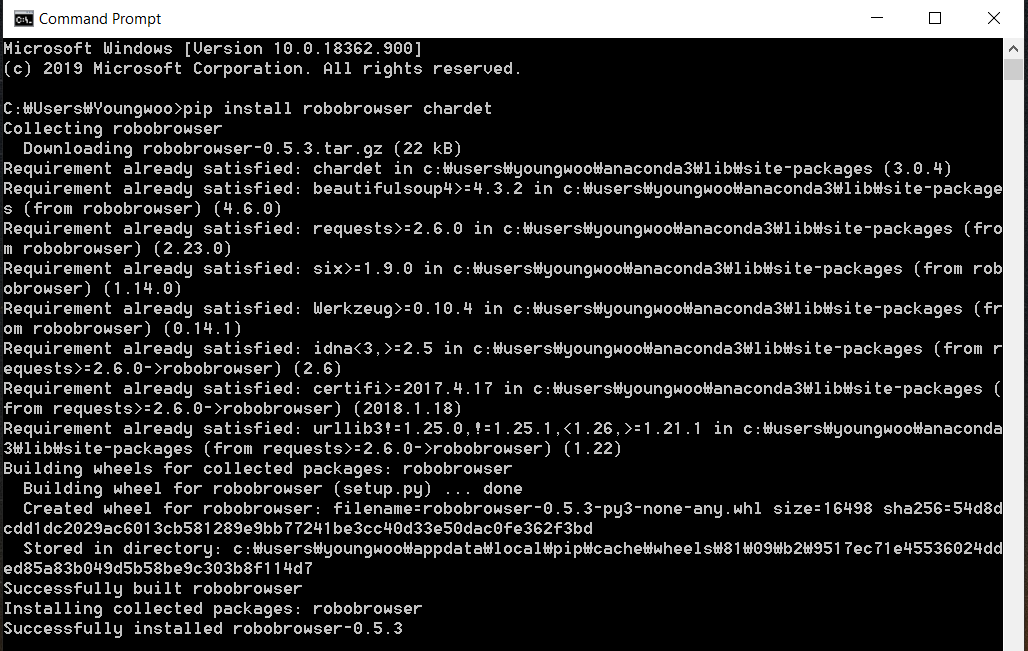

예제 5.21 은 RoboBrowser를 사용해 구글 검색을 수행하는 코드

1.	구글 메인 페이지를 엽니다.
2.	검색 키워드를 입력합니다.
3.	검색 버튼을 누릅니다.
4.	검색 결과를 획인합니다.

무상태 크롤러는 검색 결과 URL을 http://www.google.co.kr/search?q=Python처럼 URL을 조합 해서 페이지를 가져옴
    
반면 RoboBrowser는 웹 브라우저를 조작하는 것처럼 코드를 순서대로 입력

5.21 robobrowser_google.py - RoboBrowser로 구글 검색하기

In [11]:
from robobrowser import RoboBrowser

# RoboBrowser 객체를 생성합니다.
# 키워드 매개변수 parser는 BeautifulSoup()의 두 번째 매개변수와 같습니다.
browser = RoboBrowser(parser='html.parser')

# open() 메서드로 구글 메인 페이지를 엽니다.
browser.open('https://www.google.co.kr/')

# 키워드를 입력합니다.
form = browser.get_form(action='/search')
form['q'] = 'Python'
#browser.submit_form(form, list(form.submit_fields.values())[0])

browser.submit_form(form, submit=form.submit_fields['go'])

# 검색 결과 제목을 추출합니다.
# select() 메서드는 BeautifulSoup의 select() 메서드와 같습니다.
for a in browser.select('h3 > a'):
    print(a.text)
    print(a.get('href'))
    print()

BadRequestKeyError: 400 Bad Request: The browser (or proxy) sent a request that this server could not understand.

오류 ImportError: cannot import name 'cached_property' from 'werkzeug'

https://redeyesofangel.tistory.com/988

pip install werkzeug==0.16.0

In [15]:
import re
from robobrowser import RoboBrowser

browser = RoboBrowser() 
browser.open("https://en.wikipedia.org/wiki/Wikipedia")

# Must find the proper id in the html
form = browser.get_form(id="searchform")
form["search"].value = "파이썬"
browser.submit_form(form, submit=form.submit_fields['go'])

links = browser.get_links()

for link in links:
    print(link)

print("Le Fin.")

C:\Users\Youngwoo\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Youngwoo\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


<a id="top"></a>
<a class="mw-helplink" href="/wiki/Help:Searching" target="_blank">Help</a>
<a class="mw-jump-link" href="#mw-head">Jump to navigation</a>
<a class="mw-jump-link" href="#p-search">Jump to search</a>
<button aria-disabled="false" class="oo-ui-inputWidget-input oo-ui-buttonElement-button" tabindex="0" type="submit" value=""><span class="oo-ui-iconElement-icon oo-ui-iconElement-noIcon oo-ui-image-invert"></span><span class="oo-ui-labelElement-label">Search</span><span class="oo-ui-indicatorElement-indicator oo-ui-indicatorElement-noIndicator oo-ui-image-invert"></span></button>
<a href="/w/index.php?title=Special:Search&amp;profile=default&amp;search=%ED%8C%8C%EC%9D%B4%EC%8D%AC&amp;fulltext=1" title="Search in (Article)">Content pages</a>
<a href="/w/index.php?title=Special:Search&amp;profile=images&amp;search=%ED%8C%8C%EC%9D%B4%EC%8D%AC&amp;fulltext=1" title="Search for files">Multimedia</a>
<a href="/w/index.php?title=Special:Search&amp;profile=all&amp;search=%ED%8C%8C%

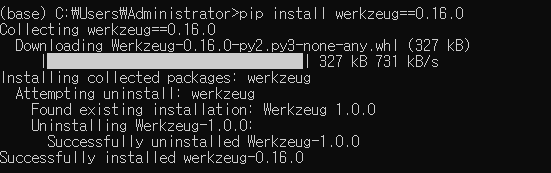

python robobrowser_google.py

In [2]:
def get_templates():
    """Return all Pixelarity templates in an array."""
    templates = []

    browser = RoboBrowser(parser='html.parser')
    browser.open("https://pixelarity.com/")
    r = browser.parsed()
    soup = BeautifulSoup(str(r[0]), features="html.parser")
    t = soup.find("section").find_all("article")

    for index in range(len(t)):
        templates.append(t[index].a.get("href").replace("/", ""))
    templates = [item.lower() for item in templates]
    templates = [item.replace(" ", "") for item in templates]

    return templates

## 5.5.2	네이버페이 주문 이력 추출하기

로그인이 필요한 웹사이트에서 데이터를 수집할 때는 RoboBrowser 등을 활용해야됨 

RoboBrawser를 사용해 네이버에 로그인하고, 네이버페이의 주문 이력을 추출

보안과 관련된 기능이 뛰어나서 로그인할 때 문제가 있다고 판단되면 보안과 관련된 기능을 작동시킵니다. 

따라서 예제를 진행하면서 로그인에 문제가 있을 경우 계정의 설정 페이지에서 보안 관련 옵션을 잠시 고고 테스트하기 바랍니다.

In [4]:
import time
import sys
import os
from robobrowser import RoboBrowser

# 인증 정보를 환경변수에서 추출합니다.
NAVER_ID = os.environ['NAVER_ID']
NAVER_PASSWORD = os.environ['NAVER_PASSWORD']

print(NAVER_ID)
print(NAVER_PASSWORD)

# RoboBrowser 객체를 생성합니다.
browser = RoboBrowser(
    # Beautiful Soup에서 사용할 파서를 지정합니다.
    parser='html.parser',
    # 일반적인 웹 브라우저의 User-Agent(FireFox)를 사용합니다.
    user_agent='Mozilla/5.0 (Macintosh; Intel Mac macOS 10.10; rv:45.0) Gecko/20100101 Firefox/45.0')

def main():
    # 로그인 페이지를 엽니다.
    print('Accessing to sign in page....', file=sys.stderr)
    browser.open('https://nid.naver.com/nidlogin.login')
    
    # 로그인 페이지에 들어가졌는지 확인합니다.
    assert '네이버 : 로그인' in browser.parsed.title.string
    
    # name='frmNIDLogin'이라는 입력 양식을 채웁니다.
    # 입력 양식의 name 속성은 개발자 도구로 확인할 수 있습니다.
    form = browser.get_form(attrs={'name': 'frmNIDLogin'})
    
    # name='id'라는 입력 양식을 채웁니다.
    form['id'] = NAVER_ID
    # name='pw'라는 입력 양식을 채웁니다.
    form['pw'] = NAVER_PASSWORD
    
    # 입력 양식을 전송합니다.
    # 로그인 때 로그인을 막는 것을 회피하고자 몇 가지 추가 정보를 전송합니다.
    print('Signing in...', file=sys.stderr)
    browser.submit_form(form, headers={
        'Referer': browser.url,
        'Accept-Language': 'ko,en-US;q=0.7,en;q=0.3',
    })
    
    # 주문 이력 페이지를 엽니다.
    browser.open('https://order.pay.naver.com/home?tabMenu=SHOPPING&frm=s_order')
    
    # 문제가 있을 경우 HTML 소스코드를 확인할 수 있게 출력합니다.
    # print(browser.parsed.prettify())
    # 주문 이력 페이지가 맞는지 확인합니다.
    # assert '네이버페이' in browser.parsed.title.string
    # 주문 이력을 출력합니다.
    print_order_history()

def print_order_history():
    """
    주문 이력을 출력합니다.
    """
    print('주문 이력을 출력합니다.')
    
    # 주문 이력을 순회합니다: 클래스 이름은 개발자 도구로 확인합니다.
    for item in browser.select('.p_info'):
        # 주문 이력 저장 전용 dict입니다.
        order = {} 
        # 주문 이력의 내용을 추출합니다.
        name_element = item.select_one('span')
        date_element = item.select_one('.date')
        price_element = item.select_one('em')
        # 내용이 있을 때만 저장합니다.
        if name_element and date_element and price_element:
            name = name_element.get_text().strip()
            date = date_element.get_text().strip()
            price = price_element.get_text().strip()
            order[name] = {
                'date': date,
                'price': price
            }
            print(order[name]['date'], '-', order[name]['price'] + '원')

if __name__ == '__main__':
    main()

hsyrinks
374*godnseo


Accessing to sign in page....


주문 이력을 출력합니다.


Signing in...


# 5.6	자바스크립트를 이용한 페이지 스크레이핑

## 5.6.1 자바스크립트를 사용한 페이지에 대한 대응 방법

■	Selenium + PhantomJS의 장점

자바스크립트를 활용한 웹 페이지를 스크레이핑할 수 있음

스크린샷을 찍을 수 있음

일반적인 웹 브라우저와 동작의 차이가 적으므로 디버그하기 쉬움

■	RoboBrowser의 장점

환경 구축이 쉬움

실행할 때 소비하는 메모리와 CPU 리소스가 적음

기본적으로 HTML만 추출하므로 처리 시간이 짧음

간단하므로 문제가 될 때는 소스코드를 확인해서 문제를 해결할 수 있음


## Selenium과 PhangomJS 설치

### Selenium을 사용한 자동 조작

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# PhantomJS 모듈의 WebDriver 객체를 생성합니다.
driver = webdriver.PhantomJS()

# Google 메인 페이지를 엽니다.
driver.get('https://www.google.co.kr/')

# 타이틀에 'Google'이 포함돼 있는지 확인합니다.
assert 'Google' in driver.title

# 검색어를 입력하고 검색합니다.
input_element = driver.find_element_by_name('q')
input_element.send_keys('Python')
input_element.send_keys(Keys.RETURN)

# 타이틀에 'Python'이 포함돼 있는지 확인합니다.
assert 'Python' in driver.title

# 스크린샷을 찍습니다.
driver.save_screenshot('search_results.png')

# 검색 결과를 출력합니다.
for a in driver.find_elements_by_css_selector('h3 > a'):
    print(a.text)
    print(a.get_attribute('href'))
    print()

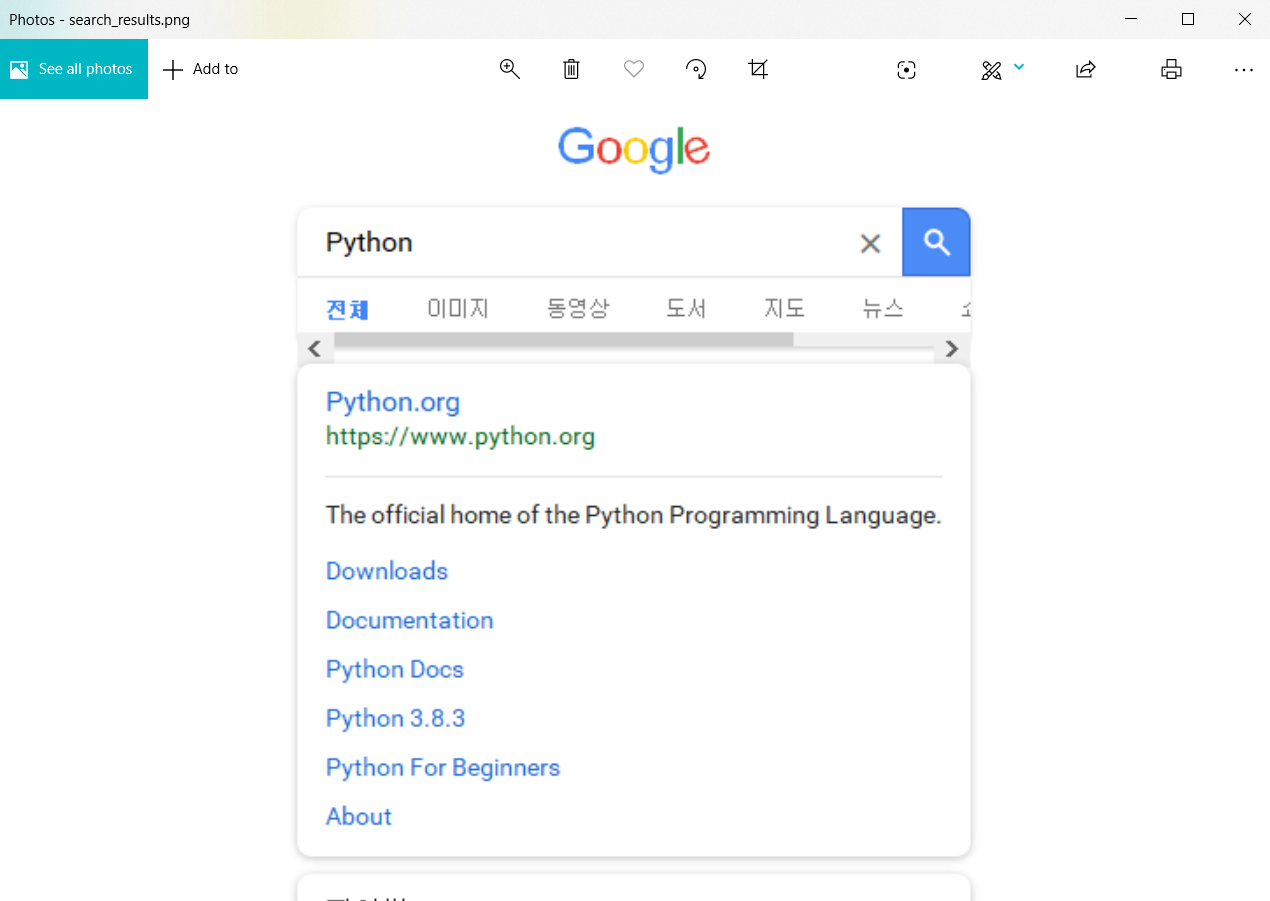

## 5.6.2 PhantomJS 활용하기

In [6]:
from selenium import webdriver

# 웹 드라이버 생성하기
driver = webdriver.PhantomJS()

# 페이지 읽어 들이기
driver.get('http://naver.com/')

# 페이지 파이를 확인하기
driver.title

'NAVER'

In [7]:
# 스크린샷 찍기
driver.save_screenshot('naver-1.png')

True

In [8]:
driver.get('http://d2.naver.com/helloworld')

# 화면 크기 지정(1)
driver.set_window_size(320, 600)
driver.save_screenshot('naver-2.png')

True

In [9]:
# 화면 크기 지정(2)
driver.set_window_size(800, 600)
driver.save_screenshot('naver-3.png')

True

In [12]:
# URL 지정
driver.get('https://www.hanbit.co.kr/media/books/book_view.html?p_code=B7033438574')
# 제목 추출하기
driver.find_elements_by_css_selector('.store_product_info_box')

[<selenium.webdriver.remote.webelement.WebElement (session="17b87aa0-babe-11ea-ac54-e3fcfcfb5bac", element=":wdc:1593514516709")>]

In [13]:
# 하나의 DOM 요소는 WebElement 객체에 대응합니다.
div = driver.find_elements_by_css_selector('.store_product_info_box')[0]
div

<selenium.webdriver.remote.webelement.WebElement (session="17b87aa0-babe-11ea-ac54-e3fcfcfb5bac", element=":wdc:1593514516709")>

In [14]:
# 속성을 추출할 때는 get_attribute() 메서드를 사용합니다.
div.get_attribute('class')

'store_product_info_box'

In [28]:
# 요소 내부에서 요소를 추가로 탐색할 수도 있습니다.
div.find_elements_by_css_selector('h3')

[<selenium.webdriver.remote.webelement.WebElement (session="17b87aa0-babe-11ea-ac54-e3fcfcfb5bac", element=":wdc:1593514516710")>]

In [36]:
# 내부의 글자를 추출할 때는 text 속성을 사용합니다.
h3[0].text

'핸즈온 머신러닝(2판)'

### 주문 이력 여러개 추출하기

In [39]:
import sys
import time
import os

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait

# 인증 정보를 환경변수에서 추출합니다.
NAVER_ID = os.environ['NAVER_ID']
NAVER_PASSWORD = os.environ['NAVER_PASSWORD']

print(NAVER_ID)
print(NAVER_PASSWORD)

def main():
    """
    메인 처리
    """
    # PhantomJS의 WebDriver 객체를 생성합니다.
    driver = webdriver.PhantomJS()
    
    # 화면 크기를 설정합니다.
    driver.set_window_size(800, 600)
    
    # 로그인하고 이동한 뒤 주문 이력을 가져옵니다.
    sign_in(driver)
    navigate(driver)
    goods = scrape_history(driver)
    # 출력합니다.
    print(goods)

def sign_in(driver):
    """
    로그인합니다
    """
    print('Navigating...', file=sys.stderr)
    print('Waiting for sign in page loaded...', file=sys.stderr)
    time.sleep(2)
    
    # 입력 양식을 입력하고 전송합니다.
    driver.get('https://nid.naver.com/nidlogin.login')
    e = driver.find_element_by_id('id')
    e.clear()
    e.send_keys(NAVER_ID)
    e = driver.find_element_by_id('pw')
    e.clear()
    e.send_keys(NAVER_PASSWORD)
    form = driver.find_element_by_css_selector("input.btn_global[type=submit]")
    form.submit()

def navigate(driver):
    """
    적절한 페이지로 이동한 뒤 
    """
    print('Navigating...', file=sys.stderr)
    driver.get("https://order.pay.naver.com/home?tabMenu=SHOPPING")
    print('Waiting for contents to be loaded...', file=sys.stderr)
    time.sleep(2)
    
    # 페이지를 아래로 스크롤합니다.
    # 사실 현재 예제에서는 필요 없지만 활용 예를 위해 넣어봤습니다.
    # 스크롤을 해서 데이터를 가져오는 페이지의 경우 활용할 수 있습니다.
    driver.execute_script('scroll(0, document.body.scrollHeight)')
    wait = WebDriverWait(driver, 10)
    
    # [더보기] 버튼을 클릭할 수 있는 상태가 될 때까지 대기하고 클릭합니다.
    # 두 번 클릭해서 과거의 정보까지 들고옵니다.
    driver.save_screenshot('note-1.png')
    button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, '#_moreButton a')))
    button.click()
    button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, '#_moreButton a')))
    button.click()
    # 2초 대기합니다.
    print('Waiting for contents to be loaded...', file=sys.stderr)
    time.sleep(2)

def scrape_history(driver):
    """
    페이지에서 주문 이력을 추출합니다.
    """
    goods = []
    for info in driver.find_elements_by_css_selector('.p_info'):
        # 요소를 추출합니다.
        link_element = info.find_element_by_css_selector('a')
        title_element = info.find_element_by_css_selector('span')
        date_element = info.find_element_by_css_selector('.date')
        price_element = info.find_element_by_css_selector('em')
        # 텍스트를 추출합니다.
        goods.append({
            'url': link_element.get_attribute('.a'),
            'title': title_element.text,
            'description': date_element.text + " - " + price_element.text + "원"
        })
    return goods
    
if __name__ == '__main__':
    main()

hsyrinks
374*godnseo


Navigating...
Waiting for sign in page loaded...


WebDriverException: Message: TypeError - undefined is not a constructor (evaluating '_getTagName(currWindow).toLowerCase()')


## RSS 피드 생성하기

RSS 피드는 단순한 XML파일입니다.

RSS 라이브러리 사용(feedgenerator)

In [ ]:
pip install feedgenerator

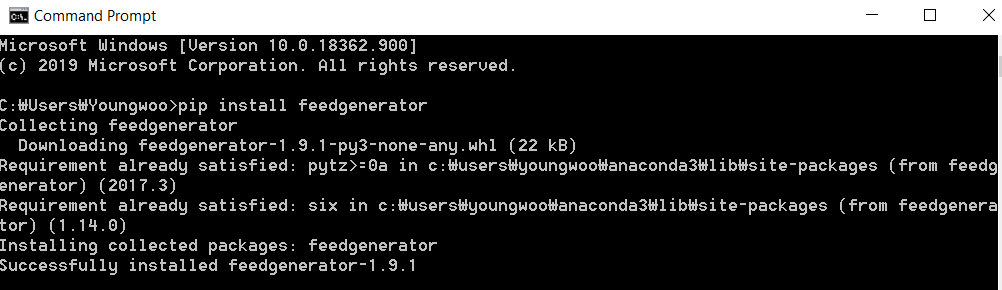

In [42]:
import sys
import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import feedgenerator

# 인증 정보를 환경변수에서 추출합니다.
NAVER_ID = os.environ['NAVER_ID']
NAVER_PASSWORD = os.environ['NAVER_PASSWORD']

def main():
    """
    메인 처리
    """
    # PhantomJS의 WebDriver 객체를 생성합니다.
    driver = webdriver.PhantomJS()
    
    # 화면 크기를 설정합니다.
    driver.set_window_size(800, 600)
    
    # 로그인하고 이동한 뒤 주문 이력을 가져옵니다.
    sign_in(driver)
    navigate(driver)
    goods = scrape_history(driver)
    
    # RSS 피드로 저장합니다.
    with open('shopping_history.rss', 'w') as f:
        save_as_feed(f, goods)

def sign_in(driver):
    """
    로그인합니다
    """
    print('Navigating...', file=sys.stderr)
    print('Waiting for sign in page loaded...', file=sys.stderr)
    time.sleep(2)
    
    # 입력 양식을 입력하고 전송합니다.
    driver.get('https://nid.naver.com/nidlogin.login')
    e = driver.find_element_by_id('id')
    e.clear()
    e.send_keys(NAVER_ID)
    e = driver.find_element_by_id('pw')
    e.clear()
    e.send_keys(NAVER_PASSWORD)
    form = driver.find_element_by_css_selector("input.btn_global[type=submit]")
    form.submit()

def navigate(driver):
    """
    적절한 페이지로 이동한 뒤 
    """
    print('Navigating...', file=sys.stderr)
    driver.get("https://order.pay.naver.com/home?tabMenu=SHOPPING")
    print('Waiting for contents to be loaded...', file=sys.stderr)
    time.sleep(2)
    # 페이지를 아래로 스크롤합니다.
    # 사실 현재 예제에서는 필요 없지만 활용 예를 위해 넣어봤습니다.
    # 스크롤을 해서 데이터를 가져오는 페이지의 경우 활용할 수 있습니다.
    driver.execute_script('scroll(0, document.body.scrollHeight)')
    wait = WebDriverWait(driver, 10)
    
    # [더보기] 버튼을 클릭할 수 있는 상태가 될 때까지 대기하고 클릭합니다.
    # 두 번 클릭해서 과거의 정보까지 들고옵니다.
    driver.save_screenshot('note-1.png')
    button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, '#_moreButton a')))
    button.click()
    button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, '#_moreButton a')))
    button.click()
    # 2초 대기합니다.
    print('Waiting for contents to be loaded...', file=sys.stderr)
    time.sleep(2)

def scrape_history(driver):
    """
    페이지에서 주문 이력을 추출합니다.
    """
    goods = []
    for info in driver.find_elements_by_css_selector('.p_info'):
        # 요소를 추출합니다.
        link_element = info.find_element_by_css_selector('a')
        title_element = info.find_element_by_css_selector('span')
        date_element = info.find_element_by_css_selector('.date')
        price_element = info.find_element_by_css_selector('em')
        # 텍스트를 추출합니다.
        goods.append({
            'url': link_element.get_attribute('.a'),
            'title': title_element.text,
            'description': date_element.text + " - " + price_element.text + "원"
        })
    return goods

def save_as_feed(f, posts):
    """
    주문 내역을 피드로 저장합니다.
    """
    # Rss201rev2Feed 객체를 생성합니다.
    feed = feedgenerator.Rss201rev2Feed(
        title='네이버페이 주문 이력',
        link='https://order.pay.naver.com/',
        description='주문 이력')
    
    # 피드를 추가합니다.
    for post in posts:
        feed.add_item(title=post['title'],
                      link=post['url'],
                      description=post['description'],
                      unique_id=post['url'])
    
    # 피드를 저장합니다.
    feed.write(f, 'utf-8')

if __name__ == '__main__':
    main()

Navigating...
Waiting for sign in page loaded...


WebDriverException: Message: TypeError - undefined is not a constructor (evaluating '_getTagName(currWindow).toLowerCase()')


# 5.7	추출한 데이터 활용하기

## 지도로 시각화하기

Google Maps JavaScript API를 사용해 위치 정보를 지도에 시각적으로 출력

### 지오코딩으로 위치 정보 추출하기

국내에서 쉽게 사용할 수 있는 지오코딩 API로는 Google Maps Geocoding API

Google Maps Geocoding API https://developers.google.com/maps/documentation/geocoding/intro
    
API 키

https://console.developers.google.com/projectselector/apis/api/geocoding_backend

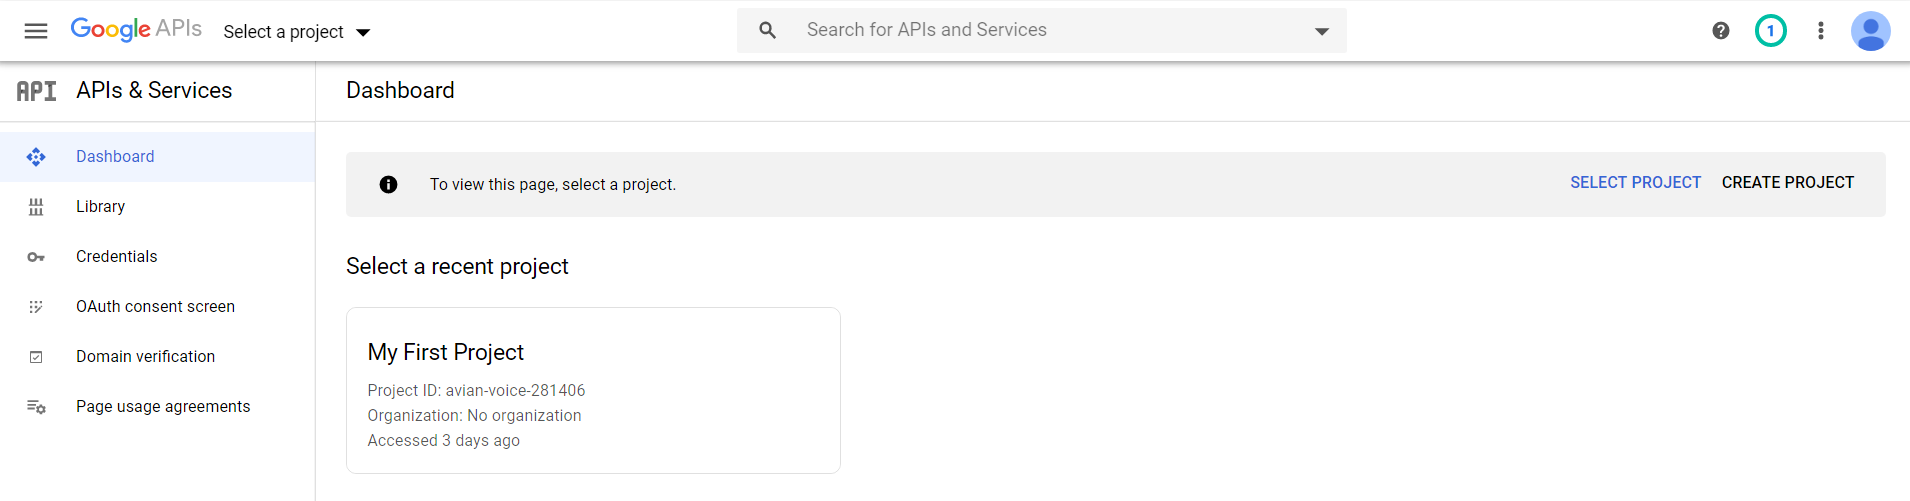

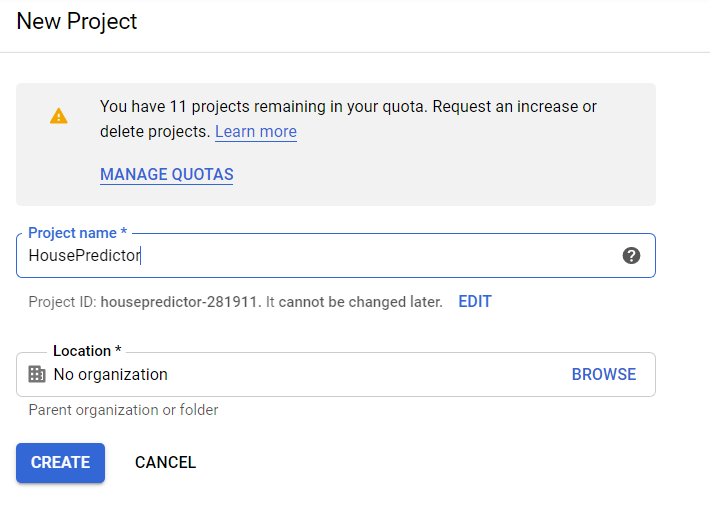

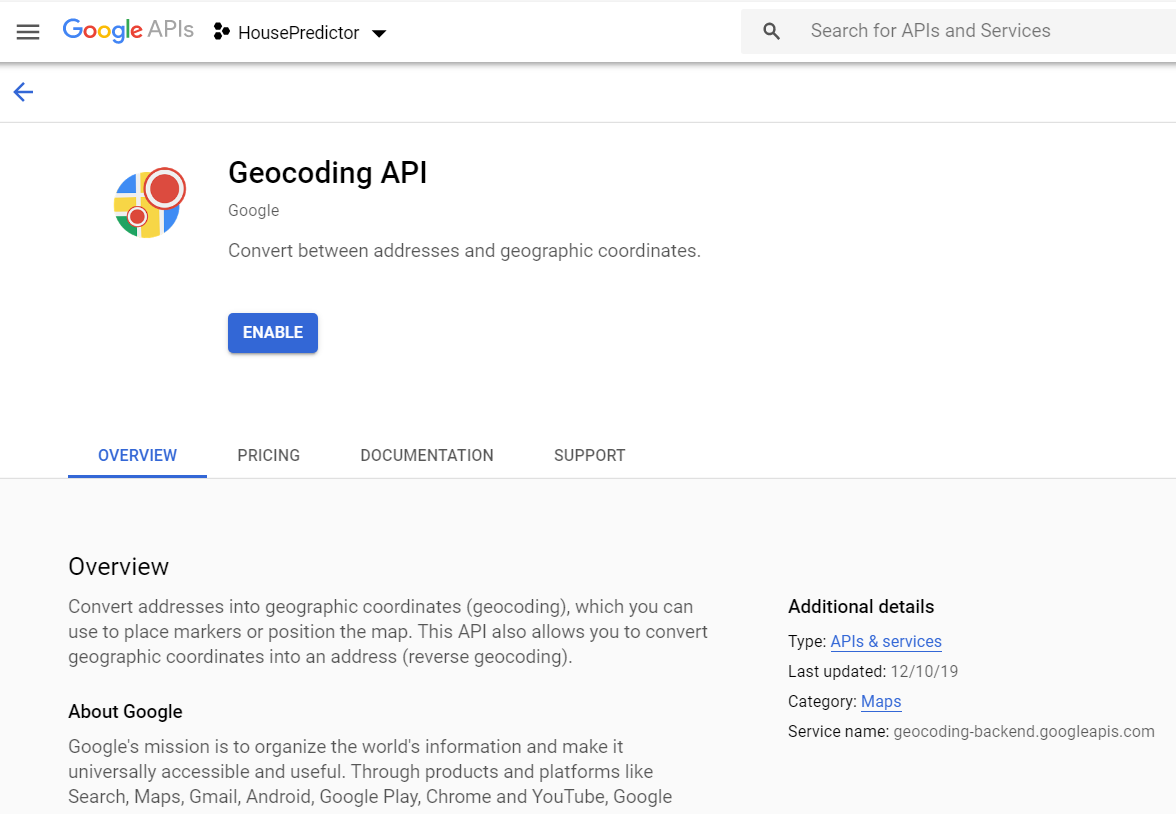

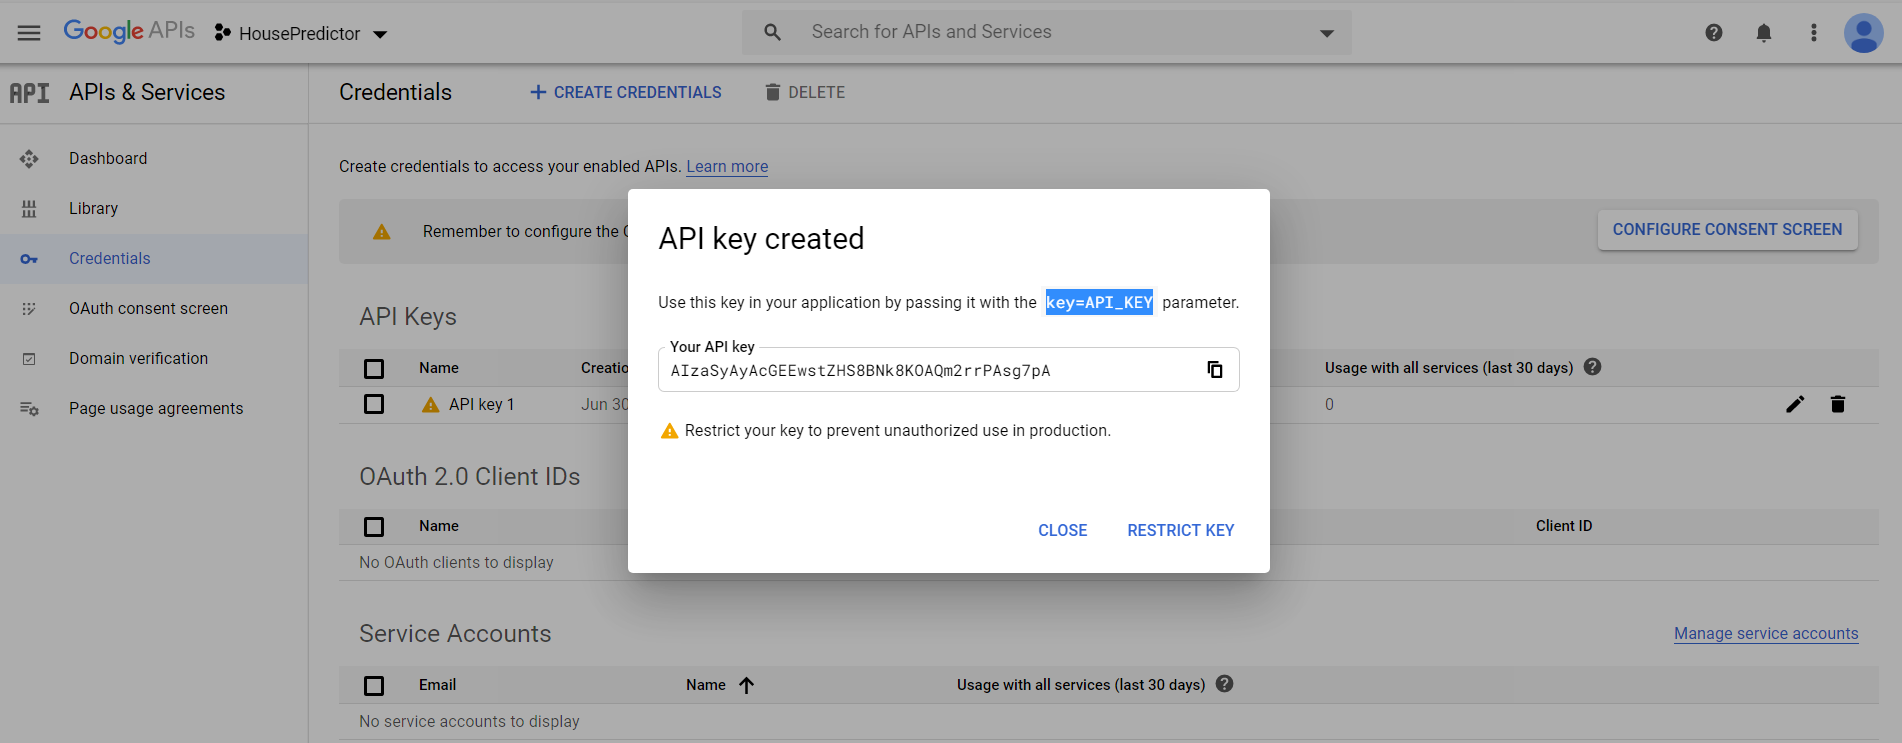

In [ ]:
pip install SPARQLWrapper

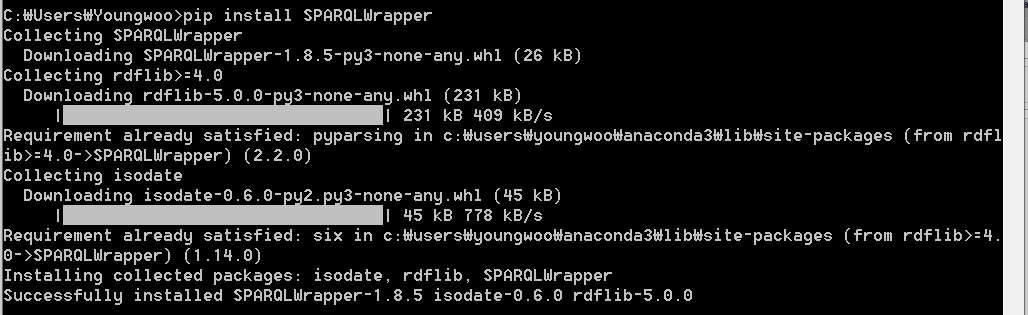

In [46]:
# pip install SPARQLWrapper
from SPARQLWrapper import SPARQLWrapper  

# SPARQL 엔드 포인트를 지정해서 인스턴스를 생성합니다.
sparql = SPARQLWrapper('http://ko.dbpedia.org/sparql')

# 한국의 박물관을 추출하는 쿼리입니다.
sparql.setQuery('''
SELECT * WHERE {
    ?s rdf:type dbpedia-owl:Museum .
    ?s prop-ko:소재지 ?address .
} ORDER BY ?s
''')

# 반환 형식을 JSON으로 지정합니다.
sparql.setReturnFormat('json')

# query()로 쿼리를 실행한 뒤 convert()로 파싱합니다.
response = sparql.query().convert()
for result in response['results']['bindings']:
    # 출력합니다.
    print(result['s']['value'], result['address']['value'])

RemoteDisconnected: Remote end closed connection without response

In [45]:
import time
import sys
import os
import json
import dbm
from urllib.request import urlopen
from urllib.parse import urlencode
from SPARQLWrapper import SPARQLWrapper

def main():
    features = []  # 박물관 정보 저장을 위한 리스트
    for museum in get_museums():
        # 레이블이 있는 경우에는 레이블, 없는 경우에는 s를 추출합니다.
        label = museum.get('label', museum['s'])
        address = museum['address']
        lng, lat = geocode(address)
        
        # 값을 출력해 봅니다.
        print(label, address, lng, lat)
        # 위치 정보를 추출하지 못 했을 경우 리스트에 추가하지 않습니다.
        if lng is None:
            continue
        
        # features에 박물관 정보를 GeoJSON Feature 형식으로 추가합니다.
        features.append({
            'type': 'Feature',
            'geometry': {'type': 'Point', 'coordinates': [lng, lat]},
            'properties': {'label': label, 'address': address},
        })

    # GeoJSON FeatureCollection 형식으로 dict를 생성합니다.
    feature_collection = {
        'type': 'FeatureCollection',
        'features': features,
    }
    # FeatureCollection을 .geojson이라는 확장자의 파일로 저장합니다.
    with open('museums.geojson', 'w') as f:
        json.dump(feature_collection, f)

def get_museums():
    """
    SPARQL을 사용해 DBpedia에서 박물관 정보 추출하기
    """
    print('Executing SPARQL query...', file=sys.stderr)
    
    # SPARQL 엔드 포인트를 지정해서 인스턴스를 생성합니다.
    sparql = SPARQLWrapper('http://ko.dbpedia.org/sparql')
    
    # 한국의 박물관을 추출하는 쿼리입니다.
    sparql.setQuery('''
    SELECT * WHERE {
        ?s rdf:type dbpedia-owl:Museum .
        ?s prop-ko:소재지 ?address .
        OPTIONAL { ?s rdfs:label ?label . }
    } ORDER BY ?s
    ''')

    # 반환 형식을 JSON으로 지정합니다.
    sparql.setReturnFormat('json')

    # query()로 쿼리를 실행한 뒤 convert()로 파싱합니다.
    response = sparql.query().convert()
    print('Got {0} results'.format(len(response['results']['bindings']), file=sys.stderr))
    # 쿼리 결과를 반복 처리합니다.
    for result in response['results']['bindings']:
        # 다루기 쉽게 dict 형태로 변환해서 yield합니다.
        yield {name: binding['value'] for name, binding in result.items()}

# Google Geolocation API
GOOGLE_GEOCODER_API_URL = 'https://maps.googleapis.com/maps/api/geocode/json'
# DBM(파일을 사용한 Key-Value 데이터베이스)로 지오코딩 결과를 캐시합니다.
# 이 변수는 dict처럼 다룰 수 있습니다.
geocoding_cache = dbm.open('geocoding.db', 'c')

def geocode(address):
    """
    매개변수로 지정한 주소를 지오코딩해서 위도와 경도를 반환합니다.
    """
    if address not in geocoding_cache:
        # 주소가 캐시에 존재하지 않는 경우 지오코딩합니다.
        print('Geocoding {0}...'.format(address), file=sys.stderr)
        time.sleep(1)
        url = GOOGLE_GEOCODER_API_URL + '?' + urlencode({
            'key': os.environ['GOOGLE_API_ID'],
            'language': 'ko',
            'address': address,
        })
        response_text = urlopen(url).read()
        # API 응답을 캐시에 저장합니다.
        # 문자열을 키와 값에 넣으면 자동으로 bytes로 변환합니다.
        geocoding_cache[address] = response_text
    
    # 캐시 내의 API 응답을 dict로 변환합니다.
    # 값은 bytes 자료형이므로 문자열로 변환합니다.
    response = json.loads(geocoding_cache[address].decode('utf-8'))
    try:
        # JSON 형식에서 값을 추출합니다.
        lng = response['results'][0]['geometry']['location']['lng']
        lat = response['results'][0]['geometry']['location']['lat']
        # float 형태로 변환한 뒤 튜플을 반환합니다.
        return (float(lng), float(lat))
    except:
        return (None, None)

if __name__ == '__main__':
    main()

Executing SPARQL query...


RemoteDisconnected: Remote end closed connection without response